# Lecture 3-6: Filtering in the Frequency Domain

## 0.- Initialize filesystem and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pydicom
from IPython.display import Image, display

## 1.- Introduction to Frequency Analysis

**Frequency domain analysis** is a fundamental technique in image processing to examine the frequency content of an image rather than its spatial intensity variations.

It transforms the image into a different representation, where each point corresponds to a specific **frequency component** of the image. This is achieved through the **Fourier Transform**, which converts the image from the spatial domain to the frequency domain.

Frequency analysis can sometimes **reveal patterns, structures, or features** that might not be obvious in the spatial domain, which makes it **more convenient or efficient**.

**Differences Between Spatial Domain and Frequency Domain**

Unlike the spatial domain, where images are analyzed based on pixel intensities and their immediate neighbors, the frequency domain provides a different perspective, revealing **how the image can be decomposed into its constituent frequencies**.

This allows operations such as filtering or enhancing images by manipulating their frequency content perform **more efficiently** than in the spatial domain.

**Applications of Frequency Domain Analysis in Medical Imaging**

Common applications of frequency domain to medical images are:

*	**Noise reduction**: used to filter out noise while **preserving** important structural **details**.
*	**Artifact removal**: remove artifacts by **targeting specific frequencies** associated with them, **instead of detecting the shape** of the artifact in the spatial domain.
*	**Image enhancement**: frequency domain techniques can **amplify** the desired frequencies while **suppressing** others, improving contrast and detail of structures.

## 2.- Foundations of Fourier Analysis

### 2.1. Fourier series


The Fourier series is based on the formulation that **any periodic function can be decomposed into a series of sinusoidal functions**, each with a specific frequency, amplitude, and phase.

It is defined for **periodic signals**, and allows a **signal** to be **represented as a sum of sine and cosine functions** (or, equivalently, **complex exponentials**) with discrete frequencies.

The Fourier series is typically expressed as:

$$f(t) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos\left(\frac{2 \pi n t}{T}\right) + b_n \sin\left(\frac{2 \pi n t}{T}\right) \right)$$

where:

* $T$ is the period of the function,
* $n$ is an integer that represents the harmonic number,
* $a_0$ is the constant (average) term,
* $a_n$, $b_n$ are the cosine and sine coefficients, respectively.

### 2.2. Complex Sinusoidal Functions

Capturing the complete information of a signal would be impossible using only **real-valued sinusoids**. To **fully describe** a signal, it is necessary to **capture both the real and imaginary components** of its oscillations, which represent both the **magnitude** and **phase** of the signal.

This is done by using **complex sinusoidal functions**, which can be expressed using **Euler's formula** as:

$$e^{j \theta} = \cos(\theta) + j\sin(\theta)$$

In the case of the Fourier series, a **periodic signal $f(t)$ with period $T$** can be represented as:

$$f(t) = \sum_{n=-\infty}^{\infty} C_n e^{j2\pi n t/T}$$

where:

* $e^{j\theta}$ is the complex exponential function, with $\theta = 2 \pi n t / T$,
* $j$ represents the imaginary unit ($\sqrt{-1}$),
* $\theta$ is the angle in the complex plane between the positive real axis and the line connecting the origin of coordinates to the point represented by the complex number $e^{j\theta}$,
* $\cos(\theta)$ is the real part of the complex exponential,
* $\sin(\theta)$ corresponds to the imaginary part,
* $C_n$ are the complex Fourier coefficients that describe both the magnitude and phase of each frequency component.

This function describes a **wave that oscillates both in the real and imaginary axes**, capturing not only the **magnitude** of the oscillation but also its **phase**.

The Fourier coefficients $C_n$ encode this information, allowing for the **reconstruction** of the signal across both axes.



## 3.- One-Dimensional Fourier Transform

### 3.1. Fourier Transform

The Fourier Transform can be considered a **generalization** of the Fourier series concept, applied to **non-periodic signals**. In both cases, the basic functions used to decompose a signal are **sine and cosine components**.

**The Fourier Transform represents a signal or image as a combination of many sinusoidal waves with different frequencies, amplitudes, and phases. The sum of all these sinusoidal waves results in the signal or image.**

For a continuous-time signal  $f(t)$ , the Fourier transform  $F(\omega)$ **converts the function from the time domain to the frequency domain**, and is defined as:

$$F(\omega) = \int_{-\infty}^{\infty} f(t) \cdot e^{-j \omega t} \, dt$$

where:

* $f(t)$: continuous-time signal in the time domain,
* $F(\omega)$: Fourier transform of $f(t)$, representing the signal in the frequency domain,
*	$\omega$: angular frequency, measured in radians per second (rad/s), and related to the frequency $f$ (in Hz) as $\omega = 2\pi f$,
* $e^{-j \omega t}$: complex exponential function, which represents a sinusoidal basis function at angular frequency $\omega$,
*	$\int_{-\infty}^{\infty}$: integral taken over all time from  $-\infty$ to $\infty$.

### 3.2. Inverse Fourier Transform

The inverse Fourier transform allows for the **reconstruction** of the original time-domain signal $f(t)$ from its frequency-domain representation $F(\omega)$:

$$f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) \cdot e^{j \omega t} d\omega$$

where:

*	$F(\omega)$: frequency-domain representation of the signal,
*	$f(t)$: reconstructed continuous-time signal in the time domain,
*	$e^{j \omega t}$: complex exponential function, which reconstructs the signal from its frequency components,
*	$\frac{1}{2\pi}$: normalization factor to ensure that the inverse transform correctly reconstructs the original signal,
*	$\int_{-\infty}^{\infty}$: sum of all frequency components $F(\omega)$, weighted by the complex exponential from $-\infty$ to $\infty$, to reconstruct the original time-domain signal, $f(t)$.


### 3.3. Discrete Fourier Transform

The Discrete Fourier Transform (DFT) and its inverse are the **discrete counterparts** to the continuous Fourier Transform, used when dealing with **digital signals or data sampled** at discrete intervals.

For a discrete-time signal $x[n]$ of length $N$, the Discrete Fourier Transform $X[k]$ **converts a discrete-time sequence from the time domain to the frequency domain**, and is defined as:

$$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \frac{2\pi}{N} kn}$$

* $x[n]$: original discrete-time signal, sampled at $n$ points,
* $n$: integer that represents the sample index, ranging from $0$ to $N-1$,
* $X[k]$: DFT of $x[n]$, representing the signal in the frequency domain,
* $k$: index corresponding to the discrete frequency component, ranging from $0$ to $N-1$,
* $N$: total number of samples in the signal,
* $e^{-j \frac{2\pi}{N} k n}$: complex exponential function, representing the basis function for each frequency component.

**The DFT converts a sequence of $N$ time-domain samples into  $N$ frequency-domain components.**

Each $X[k]$ gives the **amplitude** and **phase** of the $k$-th frequency component.

The **result** of the DFT is a **set of coefficients**, each corresponding to a particular frequency component, which indicate how much of each frequency is present in the original signal or image.

In the **context of images**, the **complex sinusoidal functions** help to **capture both the intensity variations and the spatial frequencies** of the image, which represent patterns, edges or textures that depend on the **relationship between pixels**.

#### **Step by step computation of the Discrete Fourier transform**


Let's consider a discrete-time signal composed of multiple sinusoidal components, defined as:

$$x[n] = A_1 \sin(2\pi f_1 n T) + A_2 \sin(2\pi f_2 n T) + A_3 \sin(2\pi f_3 n T)$$

where:

*	$x[n]$ is the discrete-time signal **value** at the $n$-th sample,
* $n$ is an integer **index** representing each sample point in the sequence of samples ($n = 0, 1, 2, \dots$),
*	$A_1$, $A_2$, $A_3$ represent the **amplitudes** of the sinusoidal components,
*	$f_1$, $f_2$, $f_3$ are the **frequencies** of the sinusoidal components in Hz,
*	$T$ corresponds to the **sampling interval**, which is the inverse of the **sampling rate** ($T = \frac{1}{\text{sampling rate}}$). According to the **Nyquist theorem**, the highest frequency that can be accurately represented in a sampled signal is half of the sampling rate.

The DFT can be computed through these **steps**:

1. Generate the **complex sine wave** for each frequency. This wave will be used to analyze the signal by comparing it with each frequency component.

2. Calculate the **Fourier coefficient** (a complex number) for each frequency, by multiplying the signal by the complex sinusoidal wave for that frequency and summing the results (**dot product**). This coefficient indicates how much of that specific frequency is present in the signal. This process is similar to **cross-correlation**, as it measures the **similarity** between the signal and the sinusoidal wave at each frequency.

3. Calculate the **amplitude** of each frequency component as the **magnitude** of the Fourier coefficient and adjusting the amplitude to account for **symmetry** in the frequency domain.

While step-by-step computation illustrates how the Fourier Transform works internally, the **most efficient method** to compute the DFT is through the **Fast Fourier Transform (FFT)** algorithm. This algorithm is implemented in common Python libraries such as NumPy, SciPy, and OpenCV.


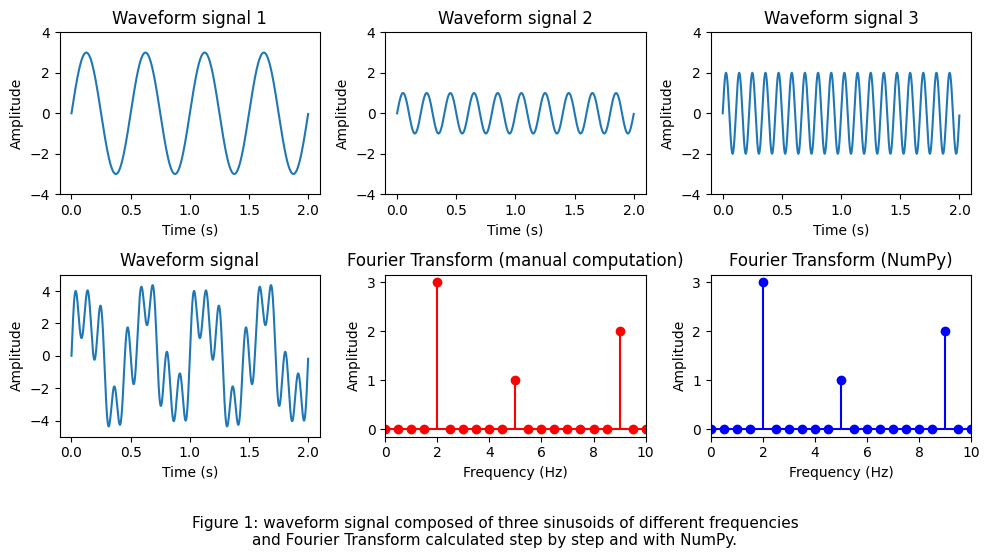

In [ ]:
# @title Manual calculation of the Fourier Transform
# Sampling rate and time vector
sampling_rate = 1000  # Hz
time_vector = np.arange(0., 2., 1/sampling_rate)  # Time vector in seconds
num_points = len(time_vector)  # Number of time points

# Create a signal with three sinusoidal components
amps = [3, 1, 2] # amplitudes
freqs = [2, 5, 9] # frequencies
signal1 = amps[0] * np.sin(2 * np.pi * freqs[0] * time_vector)
signal2 = amps[1] * np.sin(2 * np.pi * freqs[1] * time_vector)
signal3 = amps[2] * np.sin(2 * np.pi * freqs[2] * time_vector)
signal = signal1 + signal2 + signal3 # sums all the components


# Initialize the Fourier coefficients array (complex numbers)
fourier_coefficients_manual = np.zeros(num_points, dtype=complex)

# Normalized time vector for Fourier transform (between 0 and 1)
normalized_time = np.array(range(num_points)) / num_points

# Compute Fourier coefficients manually
for frequency_index in range(num_points):
    # Create complex exponential (sine wave) at the current frequency
    complex_sine_wave = np.exp(-1j * 2 * np.pi * frequency_index * normalized_time)

    # Compute the Fourier coefficient for this frequency (dot product with the signal)
    # It represents how much of this frequency is present in the signal
    # Normalization (dividing by num_points) is required to avoid that the magnitude of the Fourier
    # coefficients would scale with the length of the signal.
    # After normalizing, the FT becomes independent of the length of the signal
    fourier_coefficients_manual[frequency_index] = np.sum(signal * complex_sine_wave) / num_points

# Compute frequency vector for plotting
# The highest frequency (Nyquist frequency) is given by sampling_rate / 2
# It only represents one half of the result (the other half is symmetric)
# +1 to take into account the DC component (0 Hz)
frequencies = np.linspace(0, sampling_rate / 2, int(np.floor(num_points / 2.) + 1))

# Extract amplitude spectrum (factor of 2 accounts for the symmetry)
amplitude_manual = 2 * np.abs(fourier_coefficients_manual[:len(frequencies)])

# Compute the Fourier Transform using NumPy's built-in function
fourier_coefficients_np = np.fft.fft(signal) / num_points
# The factor 2 takes into account the negative frequency coefficients
amplitude_np = 2 * np.abs(fourier_coefficients_np[:len(frequencies)])

# Compare the two results side by side
plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.plot(time_vector, signal1)
plt.title('Waveform signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim([-4,4])

plt.subplot(2, 3, 2)
plt.plot(time_vector, signal2)
plt.title('Waveform signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim([-4,4])

plt.subplot(2, 3, 3)
plt.plot(time_vector, signal3)
plt.title('Waveform signal 3')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim([-4,4])

plt.subplot(2, 3, 4)
plt.plot(time_vector, signal)
plt.title('Waveform signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim([-5,5])

plt.subplot(2, 3, 5)
plt.stem(frequencies, amplitude_manual, linefmt='r-', markerfmt='ro', basefmt='r-', label='Manual')
plt.title('Fourier Transform (manual computation)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 10)

plt.subplot(2, 3, 6)
plt.stem(frequencies, amplitude_np, linefmt='b-', markerfmt='bo', basefmt='b-', label='NumPy FFT')
plt.title('Fourier Transform (NumPy)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 10)

plt.tight_layout()

# Add a caption below the plot
plt.figtext(0.5, -0.1,
    "Figure 1: waveform signal composed of three sinusoids of different frequencies\n"
    "and Fourier Transform calculated step by step and with NumPy.",
    ha="center", fontsize=11)

plt.show()

### 3.4. Inverse Discrete Fourier Transform

The inverse DFT (IDFT) **converts a frequency-domain sequence back to the time domain**, that is, **reconstruct** the original time-domain signal $x[n]$ from its frequency-domain representation $X[k]$:

$$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j \frac{2\pi}{N} kn}$$

* $X[k]$: frequency-domain representation of the signal,
* $x[n]$: reconstructed discrete-time signal,
* $e^{j \frac{2\pi}{N} k n}$: complex exponential function, which reconstructs the signal from its frequency components,
* $\frac{1}{N}$: normalization factor to ensure that the IDFT correctly reconstructs the original signal.

**The IDFT sums up all the frequency components $X[k]$, weighted by the complex exponential**, to reconstruct the original time-domain signal $x[n]$ .

### 3.5. Magnitude, phase and power

In the frequency domain, the **complex number** that describes each frequency component of the signal contains both a **real part and an imaginary part**, which together **encode** two fundamental characteristics of the signal at each frequency: the **magnitude** (the strength of the frequency component) and the **phase** (how shifted or delayed the frequency component is relative to the start of the signal). Additionally, the **power** measures the total energy contained in a particular frequency component.

Given the Fourier coefficients $X[k]$, where $k$ represents the frequency index, these three properties can be derived as:

* **Magnitude**, $|X[k]|$: represents the **amplitude** of the frequency component and is computed as:

$$|X[k]| = \sqrt{\text{Re}^2[k] + \text{Im}^2[k]}$$

* **Phase**, $\theta[k]$: describes the **phase shift** of the frequency component and is calculated as:

$$\theta[k] = \arctan\left(\frac{\text{Im}[k]}{\text{Re}[k]}\right)$$

* **Power**, $P[k]$: indicates the **energy** associated with each frequency, and corresponds to the square of the magnitude:

$$P[k] = |X[k]|^2 = \text{Re}^2[k] + \text{Im}^2[k]$$

where:

* $\text{Re}[k]$ and $\text{Im}[k]$ are the real and imaginary parts of the Fourier coefficient $X[k]$, respectively,
* $k$ is the index corresponding to each frequency in the DFT,
* $t$ is the time variable,
* $N$ is the total number of points in the signal.

Using Euler's formula:

$$e^{j\theta} = \cos(\theta) + j\sin(\theta)$$

where $\theta = \frac{2\pi}{N}kn$, the Fourier coefficient can be decomposed into its **real and imaginary components**, which are used to compute these three properties.





## 4.- Two-Dimensional Fourier Transform

### 4.1. 2D Fourier Transform

The 2D Fourier Transform is a **generalization** of the 1D Fourier Transform to **two dimensions**, commonly applied to **images**.

Just like the 1D Fourier Transform converts a time-domain signal into its frequency-domain representation, the 2D Fourier Transform **converts a spatial-domain image into its frequency-domain representation**.

Given a **two-dimensional function** or signal, $f(x, y)$, which represents the **intensity values** of an image, the 2D FT $F(u, v)$ is defined as:

$$F(u, v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) \cdot e^{-j 2\pi (ux + vy)} \, dx \, dy$$

where:

* $f(x, y)$ is the original image or 2D function in the spatial domain,
* $F(u, v)$ is the transformed image or function in the frequency domain,
* $u$ and $v$ are the frequency variables corresponding to the spatial coordinates $x$ and $y$, respectively,
* $e^{-j 2\pi (ux + vy)}$ represents the complex sinusoidal basis functions that are used to decompose the original image into its frequency components.

The result of the 2D Fourier Transform is a **complex-valued function** $F(u, v)$, where the **magnitude** represents the **amplitude** of a particular frequency component, and the **phase** represents the **phase shift** of that component.

### 4.2. Inverse 2D Fourier Transform

**To recover the original image** $f(x, y)$ from its frequency domain representation $F(u, v)$, the inverse 2D Fourier Transform (2D IFT) is used, defined as:

$$f(x, y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} F(u, v) \cdot e^{j 2\pi (ux + vy)} \, du \, dv$$




### 4.3. Discrete 2D Fourier Transform

In practice, since **images** are discrete 2D signals, the Discrete 2D Fourier Transform (2D DFT) is used.

For an  $M \times N$  image $f[x, y]$ sampled at discrete points, the DFT is given by:

$$F[u, v] = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f[x, y] \cdot e^{-j 2\pi \left(\frac{ux}{M} + \frac{vy}{N}\right)}$$

Here, the double summation replaces the continuous integral, and the frequencies $u$ and $v$ are also sampled at **discrete intervals**, with $u = 1, 2, \ldots, M-1$ and $v = 1, 2, \ldots, N-1$.

The **inverse 2D DFT to recover the image** from its frequency domain representation is defined as:

$$f[x, y] = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F[u, v] \cdot e^{j 2\pi \left(\frac{ux}{M} + \frac{vy}{N}\right)}$$

for $x = 1, 2, \ldots, M-1$ and $y = 1, 2, \ldots, N-1$.

The **normalization factor** $\frac{1}{MN}$ ensures that the amplitude of the reconstructed image matches the original image's amplitude.

### 4.4. Properties of the 2D Fourier Transform

Similarly to the 1D FT, the **magnitude, phase and power** of the 2D FT can be computed as:

$$|F[u,v]| = \sqrt{\text{Re}^2[u,v] + \text{Im}^2[u,v]}$$

$$\theta[u,v] = \arctan\left(\frac{\text{Im}[u,v]}{\text{Re}[u,v]}\right)$$

$$P[u,v] = |F[u,v]|^2 = \text{Re}^2[u,v] + \text{Im}^2[u,v]$$


The 2D Fourier Transform has the following **properties**:

*	The **two summations** in the 2D FT can be **separated**: one performs a 1D FT along the **columns**, and the other performs another 1D FT along the **rows** of the image.

*	After applying the two 1D DFTs, the resulting image has the **low-frequency components at the corners and the high-frequency components in the center** of the image. It is common practice to **recenter** the image, shifting the low frequencies to the center and the high frequencies to the corners.

* $F(0,0)$ represents the average of all pixel values in the image (**DC component**). This value usually corresponds to the **highest value** (brightest pixel) in the Fourier Transform image, placed at the **center** after shifting the image.

*	The computational complexity of the DFT is $O(N^2)$, which makes it slow for large images. In practice, the DFT is not typically computed as two 1D DFTs, but rather using the **Fast Fourier Transform (FFT)**, which has a complexity of $O(N\log N)$, making it several orders of magnitude faster.

**Visualization**

An N x N image will result in a **N x N x 2 2D FFT**, because it represents a complex value (real and imaginary components) for each coordinate.

In contrast, the **magnitude** (the array of values that is visualized as the 2D FFT image) will be an **N x N array**, since it only includes 1 value (the magnitude) for each coordinate.

The **magnitude** of the Fourier Transform is often visualized using a **logarithmic scale** to make the frequency components more interpretable. The **center** of the frequency domain image represents the **low-frequency components** (e.g., smooth areas of the image), while the **corners** represent the **high-frequency components** (edges and fine details).

The Fourier Transform of an image is the representation of a large number of sinusoids in the frequency domain, where **each sinusoid is plotted as 2 bright points** (the frequency and its symmetrical).

For a real image that consists of a great number of frequencies, the **interpretation** of the 2D FFT **is not intuitive**, as it may be the case with the 1D FFT.

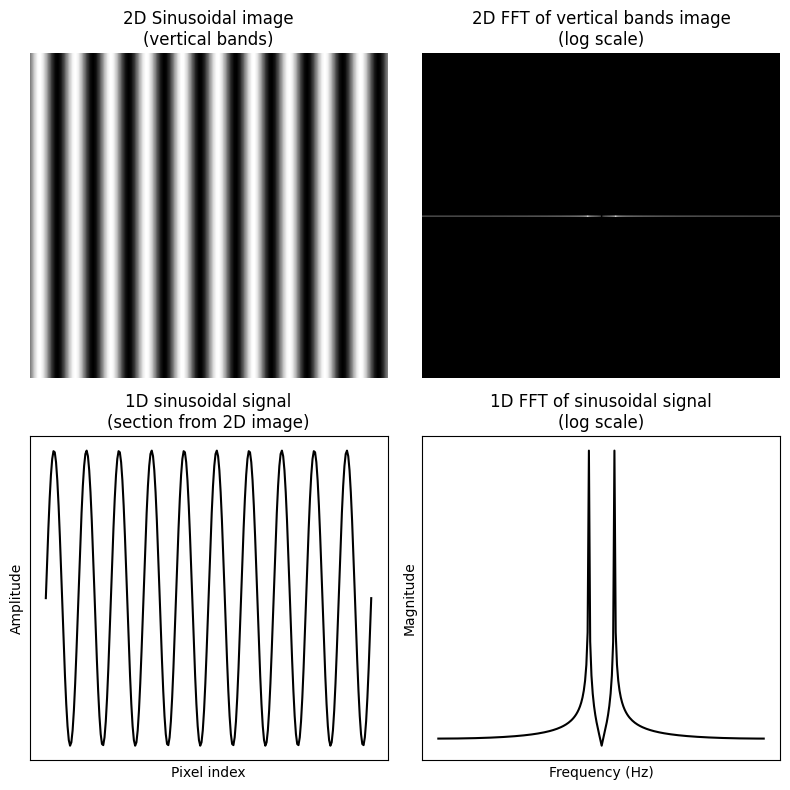

Figure 2: 2D sinusoidal image and its 2D FFT in log scale (top) section of the 2D sinusoidal wave and its 1D FFT (bottom).

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/2D_sine_wave_FFT.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 2: 2D sinusoidal image and its ' \
   '2D FFT in log scale (top) section of the 2D sinusoidal wave and its 1D FFT (bottom).</p>'
display({'text/html': caption}, raw=True)

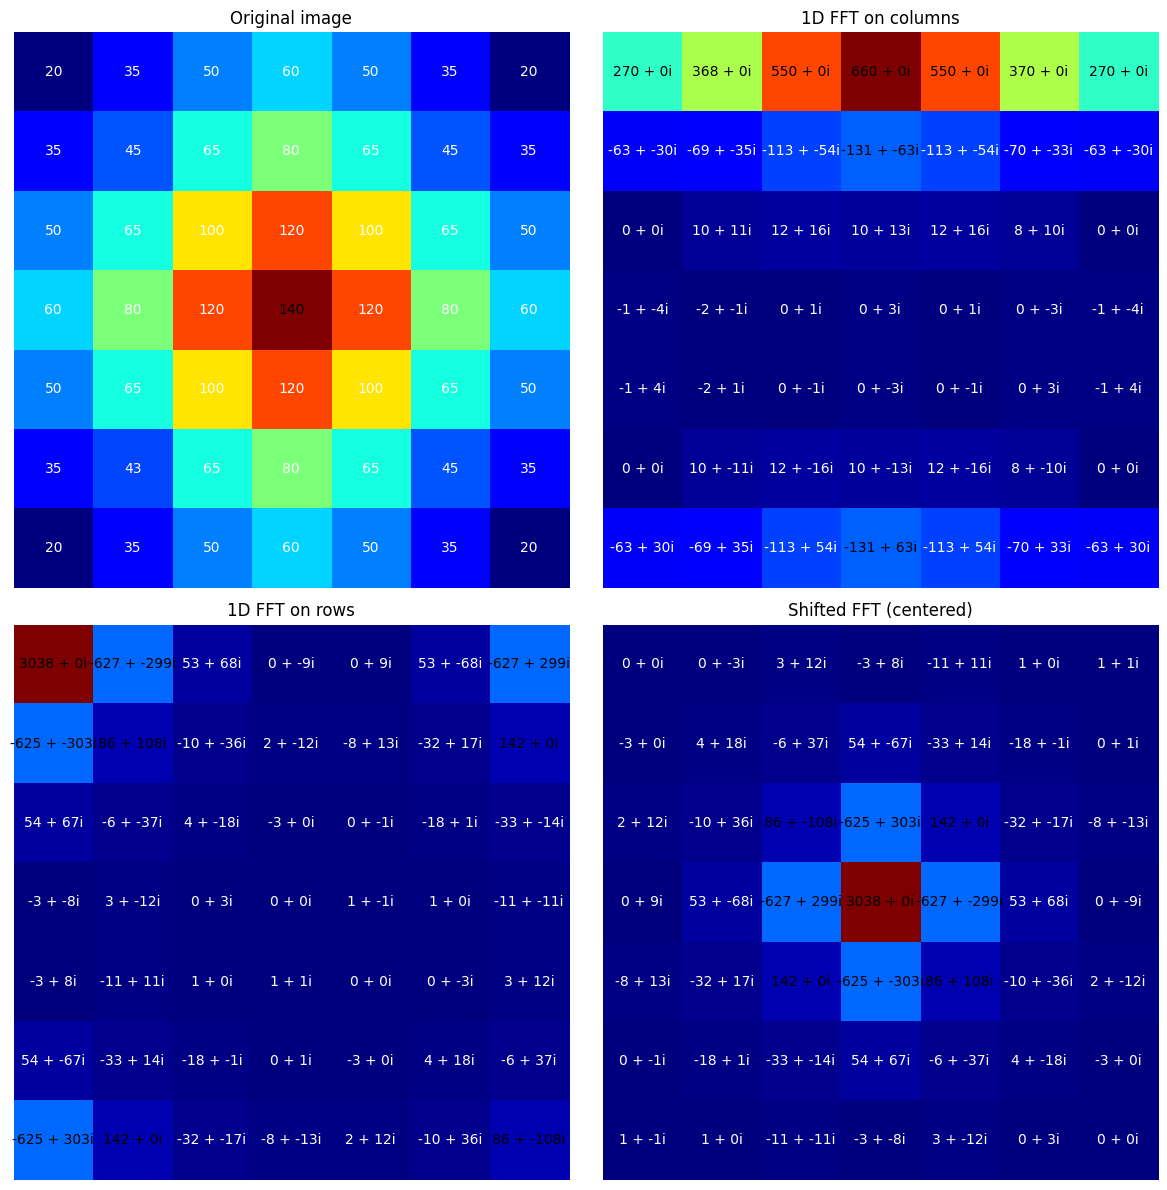

Figure 3: Visualization of the 2D FFT process:
original 6×6 image in the spatial domain (top-left),
1D FFT applied to the columns (top-right),
1D FFT applied to the rows, completing the 2D FFT (bottom-left),
Shifted 2D FFT, with the low frequencies centered (bottom-right).

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/2D_FFT_(rows-columns-shifted).png'
display(Image(filename=image_path, width=800))
caption = """
<p style="text-align: left;">
Figure 3: Visualization of the 2D FFT process:
original 6×6 image in the spatial domain (top-left),
1D FFT applied to the columns (top-right),
1D FFT applied to the rows, completing the 2D FFT (bottom-left),
Shifted 2D FFT, with the low frequencies centered (bottom-right).
</p>
"""
display({'text/html': caption}, raw=True)

## 5.- Convolution

### 5.1. Convolution in the Spatial and Frequency Domains

In the **spatial domain**, **convolution** ($\ast$) is calculated as the integral of the **overlap** between a signal, $f(t)$ and a filter, $g(t)$:

$$h(t) = (f \ast g)(t) = \int_0^t f(\tau)g(t-\tau)d\tau$$

For **images**, convolution is performed by **sliding the filter window over the image**. For each pixel, the element-wise multiplication between the **overlapping region** of the image $I(x, y)$ and the kernel $K(m, n)$ is computed, resulting in a new value for that pixel:

$$H(x, y) = (I \ast K)(x, y) = \sum_{m=-M}^{M} \sum_{n=-N}^{N} I(x - m, y - n) \cdot K(m, n)$$

**The new image is constructed pixel by pixel**, and represents the **degree of match** between the filter and the corresponding parts of the original image.

However, by the **convolution theorem**, **convolution** in the spatial domain is **equivalent** to **pointwise multiplication** in the frequency domain:

$$h(t) = (f \ast g)(t) \iff H(\omega) = F(\omega) \cdot G(\omega) = (F \cdot G)(\omega)$$

For images, **convolution in the frequency domain** is **calculated on the entire image at once** as the pointwise multiplication of the Fourier Transforms of the image and the filter:

$$H(x, y) = (I \ast K)(x, y) \iff H(u, v) = I(u, v) \cdot K(u, v) = (I \cdot K)(u, v)$$

This, together with computing the DFT with the FFT algorithm, makes **convolution in the frequency domain** a **very fast operation** in computers, so usually, convolution is performed **more efficiently** in the frequency domain than in the spatial domain.

### 5.2. Spatial Kernels and Their Frequency Domain Representations

**Spatial kernels** are applied directly to the **pixels** in the **spatial domain**. However, their behavior can also be better understood by examining their **effects in the frequency domain** using the Fourier Transform (FT).

**Mean filter (box filter)**

In the **spatial domain**, the mean filter **smooths the image** by **averaging the pixel values** within a neighborhood, reducing sharp variations. According to the weights it assigns (all 1's), this filter acts as a **low-pass filter**.

$$\text{Mean filter (3x3):} \quad \frac{1}{9} \cdot \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$

In the **frequency domain**, the mean filter also behaves as a low-pass filter, allowing low-frequency components (smooth variations) to pass through while attenuating high-frequency components (edges and noise). The **Fourier Transform** of the mean filter kernel produces a **bright center** in the frequency domain, indicating the **preservation of low frequencies**, with diminishing intensity as it moves toward higher frequencies, reflecting the attenuation of these components.

The FT of the box filter resembles a **sinc function**: it has a main lobe centered at 0 with side lobes, gradually decaying as moving away from the center. These side lobes in the frequency domain correspond to the **ringing artifacts** that can appear in images processed with this filter due to its sharp cutoff in the spatial domain.




<img src="https://www.researchgate.net/profile/George-Wolberg/publication/2918266/figure/fig9/AS:394712952393766@1471118309924/Box-filter-a-kernel-b-Fourier-transform.png" alt="Caption" width="600">
<p style="text-align: center;">Figure 4: Mean or box filter (left) and Fourier Transform (right). Source: <a href="https://www.researchgate.net/figure/Box-filter-a-kernel-b-Fourier-transform_fig9_2918266">ResearchGate.</a></p>





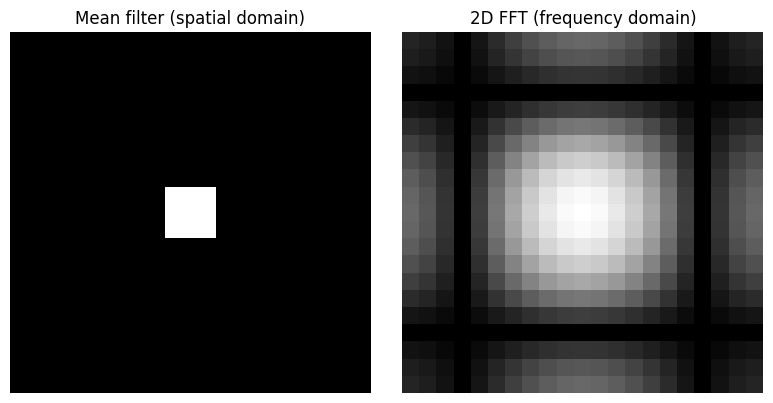

In [ ]:
# Define the 3x3 Mean filter (averaging filter)
mean_filter = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

# Pad the filter to a larger size to better visualize the FFT
# Tuplas ((9, 9), (9, 9)) indicates the number of elements to add at the top, bottom, left and right
# 'constant' indicates that the values added are constant (0 by default)
# The resulting matrix is a (3+9+9)x(3+9+9) array with all added elements equal to 0
padded_filter = np.pad(mean_filter, ((9, 9), (9, 9)), 'constant')

# Compute the 2D FFT of the padded mean filter
# np.fft.fft2: computes the 2D Discrete Fourier Transform (DFT) of the input array
# np.fft.fftshift: rearranges the Fourier transform output so that the zero-frequency component is centered
fft_mean_filter = np.fft.fftshift(np.fft.fft2(padded_filter))

# Compute the magnitude spectrum for visualization
# np.abs: calculates the magnitude (or absolute value) of the real and imaginary components,
#.        which represents the strength (or intensity) of each frequency component in the image
# + 1: added to the magnitude to avoid taking the logarithm of zero
# np.log: logarithm of the magnitude, used to compress the range of values
magnitude_spectrum = np.log(np.abs(fft_mean_filter) + 1)

# Plot the results
plt.figure(figsize=(8, 4))

# Spatial Domain - Mean Filter
plt.subplot(1, 2, 1)
plt.title("Mean filter (spatial domain)")
plt.imshow(padded_filter, cmap='gray', vmin=0, vmax=1/9, extent=[-15, 15, -15, 15])
#plt.colorbar()
plt.axis('off')

# Frequency Domain - 2D FFT of Mean Filter
plt.subplot(1, 2, 2)
plt.title("2D FFT (frequency domain)")
plt.imshow(magnitude_spectrum, cmap='gray', extent=[-15, 15, -15, 15])
#plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()

Original Gaussian filter:
[[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]

Magnitude of the 2D FFT:
[[ 1.  4.  1.]
 [ 4. 16.  4.]
 [ 1.  4.  1.]]

Reconstructed filter after IFFT:
[[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]


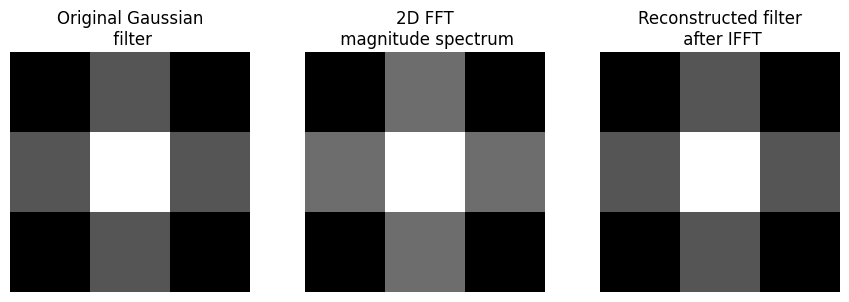

In [ ]:
# Define the Gaussian filter
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32)

# Apply the 2D FFT and shift the zero-frequency component to the center
fft_2d_shifted = np.fft.fftshift(np.fft.fft2(gaussian_kernel))

# Compute the magnitude spectrum of the 2D FFT for visualization
magnitude_spectrum = np.abs(fft_2d_shifted)
magnitude_spectrum_log = np.log(magnitude_spectrum + 1)  # Use logarithmic scale for better visualization

# Apply the inverse FFT using NumPy
ifft_2d_shifted = np.fft.ifftshift(fft_2d_shifted)  # Shift the zero-frequency component back
ifft_2d = np.fft.ifft2(ifft_2d_shifted).real  # Take the real part of the inverse FFT

# Print the original filter and the result after inverse FFT
print("Original Gaussian filter:")
print(gaussian_kernel)

print("\nMagnitude of the 2D FFT:")
print(np.round(magnitude_spectrum))

print("\nReconstructed filter after IFFT:")
print(np.round(ifft_2d))  # Rounded to nearest integer for comparison

# Plotting the original and reconstructed filters
plt.figure(figsize=(9, 3))

# Original Gaussian Filter
plt.subplot(1, 3, 1)
plt.imshow(gaussian_kernel, cmap='gray')
plt.title("Original Gaussian\n filter")
plt.axis('off')

# 2D FFT Magnitude Spectrum (Logarithmic scale)
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.title("2D FFT\n magnitude spectrum")
plt.axis('off')

# Reconstructed Filter after IFFT
plt.subplot(1, 3, 3)
plt.imshow(np.round(ifft_2d), cmap='gray')
plt.title("Reconstructed filter\n after IFFT")
plt.axis('off')

plt.tight_layout()
plt.show()

Original Gaussian filter:
[[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]

Magnitude of the 2D FFT:
[[ 1.  4.  1.]
 [ 4. 16.  4.]
 [ 1.  4.  1.]]

Reconstructed filter after IFFT:
[[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]


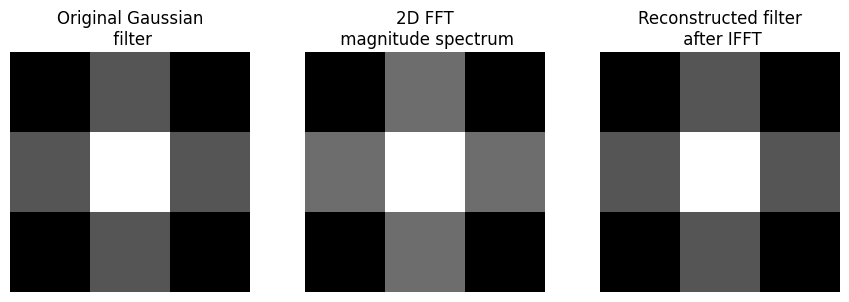

In [ ]:
# Define the Gaussian filter
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32)

# Apply the 2D FFT to the Gaussian filter
# cv2.DFT_COMPLEX_OUTPUT instructs OpenCV to return a 2-channel output
 # (real and imaginary parts) as a complex number
fft_2d = cv2.dft(np.float32(gaussian_kernel), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center
fft_2d_shifted = np.fft.fftshift(fft_2d)

# Compute the magnitude spectrum of the 2D FFT for visualization
# fft_2d_shifted[:, :, 0] and fft_2d_shifted[:, :, 1] refer to the real and
# imaginary components, respectively
magnitude_spectrum = cv2.magnitude(fft_2d_shifted[:, :, 0], fft_2d_shifted[:, :, 1])
magnitude_spectrum_log = np.log(magnitude_spectrum + 1)  # Use logarithmic scale for better visualization

# Apply the inverse FFT
# - When the input signal is real (as in most images) only teh real part is necessary
#   for reconstruction, and the imaginary part should be very close to zero and can be ignored
# - The flag cv2.DFT_REAL_OUTPUT instructs OpenCV to return only the real part of the inverse DFT result
ifft_2d = cv2.idft(np.fft.ifftshift(fft_2d_shifted), flags=cv2.DFT_REAL_OUTPUT)

# Normalize the IFFT by dividing by the number of elements in the kernel filter
ifft_2d_normalized = ifft_2d / (gaussian_kernel.shape[0] * gaussian_kernel.shape[1])

# Print the original filter and the result after inverse FFT
print("Original Gaussian filter:")
print(gaussian_kernel)

print("\nMagnitude of the 2D FFT:")
print(np.round(magnitude_spectrum))

print("\nReconstructed filter after IFFT:")
print(np.round(ifft_2d_normalized))  # Rounded to nearest integer for comparison

# Plotting the original and reconstructed filters
plt.figure(figsize=(9, 3))

# Original Gaussian Filter
plt.subplot(1, 3, 1)
plt.imshow(gaussian_kernel, cmap='gray')
plt.title("Original Gaussian\n filter")
plt.axis('off')

# 2D FFT Magnitude Spectrum (Logarithmic scale)
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.title("2D FFT\n magnitude spectrum")
plt.axis('off')

# Reconstructed Filter after IFFT
plt.subplot(1, 3, 3)
plt.imshow(np.round(ifft_2d_normalized), cmap='gray')
plt.title("Reconstructed filter\n after IFFT")
plt.axis('off')

plt.tight_layout()
plt.show()

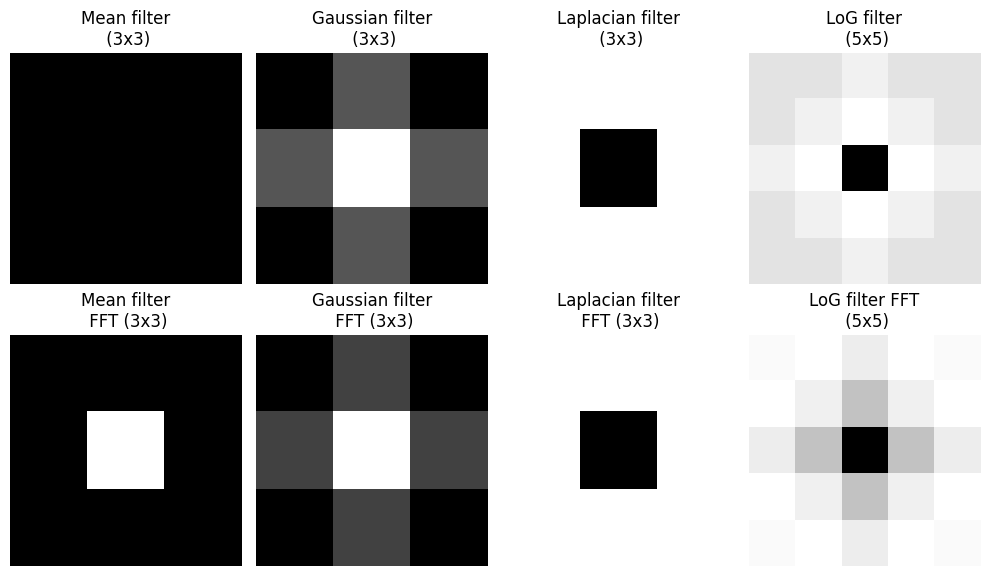

In [ ]:
# Define the kernels
mean_kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

gaussian_kernel = np.array([
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]
])

laplacian_kernel = np.array([
    [1,  1, 1],
    [1, -8, 1],
    [1,  1, 1]
])

LoG_kernel = np.array([[ 0,  0,   1,  0,  0],
                       [ 0,  1,   2,  1,  0],
                       [ 1,  2, -16,  2,  1],
                       [ 0,  1,   2,  1,  0],
                       [ 0,  0,   1,  0,  0]])

# Compute the 2D FFT using NumPy and shift the zero-frequency component to the center
dft_mean = np.fft.fftshift(np.fft.fft2(mean_kernel))
dft_gaussian = np.fft.fftshift(np.fft.fft2(gaussian_kernel))
dft_laplacian = np.fft.fftshift(np.fft.fft2(laplacian_kernel))
dft_LoG = np.fft.fftshift(np.fft.fft2(LoG_kernel))

# Compute the magnitude spectrum directly from the complex DFT result
magnitude_spectrum_mean = np.abs(dft_mean)
magnitude_spectrum_gaussian = np.abs(dft_gaussian)
magnitude_spectrum_laplacian = np.abs(dft_laplacian)
magnitude_spectrum_LoG = np.abs(dft_LoG)

# Plotting the magnitude spectrums and spatial filters in a 2x5 figure
plt.figure(figsize=(10, 6))

# First row: spatial domain (grayscale representation of filters)
# Mean filter
plt.subplot(2, 4, 1)
plt.imshow(mean_kernel, cmap='gray')
plt.title("Mean filter\n (3x3)")
plt.axis('off')

# Gaussian filter
plt.subplot(2, 4, 2)
plt.imshow(gaussian_kernel, cmap='gray')
plt.title("Gaussian filter\n (3x3)")
plt.axis('off')

# Laplacian filter
plt.subplot(2, 4, 3)
plt.imshow(laplacian_kernel, cmap='gray')
plt.title("Laplacian filter\n (3x3)")
plt.axis('off')

# Laplacian of Gaussian filter
plt.subplot(2, 4, 4)
plt.imshow(LoG_kernel, cmap='gray')
plt.title("LoG filter\n (5x5)")
plt.axis('off')

# Second row: frequency domain (magnitude spectrum)
# Mean filter FFT
plt.subplot(2, 4, 5)
plt.imshow(np.log1p(magnitude_spectrum_mean), cmap='gray')
plt.title("Mean filter\n FFT (3x3)")
plt.axis('off')

# Gaussian filter FFT
plt.subplot(2, 4, 6)
plt.imshow(np.log1p(magnitude_spectrum_gaussian), cmap='gray')
plt.title("Gaussian filter\n FFT (3x3)")
plt.axis('off')

# Laplacian filter (2) FFT
plt.subplot(2, 4, 7)
plt.imshow(np.log1p(magnitude_spectrum_laplacian), cmap='gray')
plt.title("Laplacian filter\n FFT (3x3)")
plt.axis('off')

# Laplacian of Gaussian FFT
plt.subplot(2, 4, 8)
plt.imshow(np.log1p(magnitude_spectrum_LoG), cmap='gray')
plt.title("LoG filter FFT\n (5x5)")
plt.axis('off')

plt.tight_layout()
plt.show()

## 6.- Filtering in the Frequency Domain

In the frequency domain, **each component** of the Fourier transform **represents the entire spatial image**, modified by exponential terms, making it **difficult to directly associate** specific image components with their transform.

However, general relationships can be identified:

* **Low frequencies** correspond to slow intensity variations (e.g., smooth surfaces)

* **High frequencies** represent rapid changes, such as edges.

**Filtering in the frequency domain involves modifying the Fourier transform and then applying the inverse transform to return to the spatial domain**.

The **magnitude** (spectrum) of the transform provides insight into the intensity characteristics of an image, while the **phase** generally offers little visual information.

By analyzing frequency components and their association with image features, it becomes possible to achieve useful results in image processing, such as **enhancing or suppressing certain image features**.


**Steps** in frequency domain filtering:

1. **Fourier Transform**: convert the image or signal from the spatial domain to the frequency domain using the Fourier Transform.

	This process **decomposes the image into its sinusoidal components**, each corresponding to a specific frequency. The result is a frequency spectrum that shows how much of each frequency is present in the image.

2. **Filtering**: once the image is in the frequency domain, a filter is applied to manipulate the frequency content.

	Filters can be designed to enhance or suppress specific frequency ranges. Common types of filters include:

	* **Low-pass filters**: allow low frequencies to pass through while attenuating high frequencies. They are used for **smoothing** and **reducing noise** in images, removing sharp transitions such as edges or fine details.

	* **High-pass filters**: allow high frequencies to pass through while attenuating low frequencies, which is the case for **edge detection and enhancing fine details** in images.

	* **Band-pass filters**: these filters allow only a specific range of frequencies to pass through, while suppressing frequencies outside this range. They are **useful when specific frequency components**, either low or high, **need to be isolated** from the image.

	* **Notch filters**: notch filters are designed to **remove** specific, localized frequencies from an image, typically corresponding to **periodic patterns, noise, or artifacts** in the frequency domain. Notch filters target these specific frequencies while leaving the rest of the image data intact.

3. **Inverse Fourier transform**: the modified frequency spectrum is transformed back into the spatial domain using the Inverse Fourier Transform.

	The result is a filtered image where certain features, such as edges or noise, have been **enhanced or suppressed** according to the filter used.

Size of the image: (256, 256)
Size of the 2D DFT: (256, 256, 2)
Size of the magnitude spectrum: (256, 256)


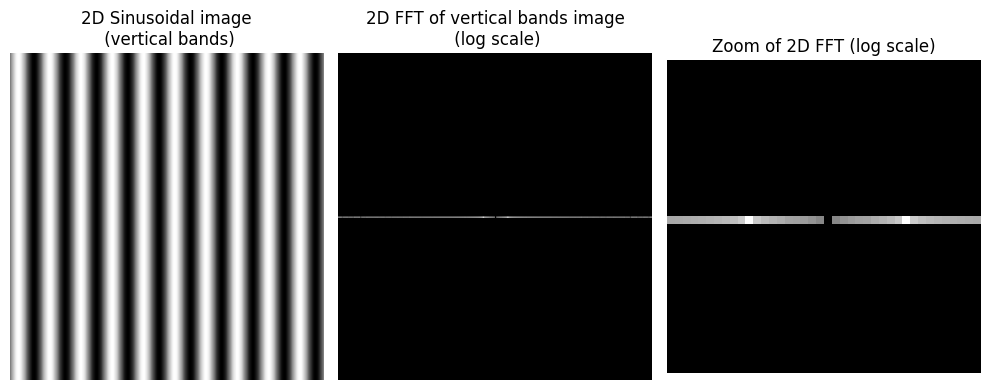

In [ ]:
# Load the image in grayscale
image_path = '/content/drive/MyDrive/PIM/Images/vertical_bands.png'
vertical_bands = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print("Size of the image:", np.shape(vertical_bands))

# Subtract the mean before applying the FFT to remove the DC component
# to simulate a 2D sinusoidal wave without offset
vertical_bands_mean_subtracted = vertical_bands - np.mean(vertical_bands)

# 2D FFT of the image with vertical bands using cv2.dft (with datatype float32)
fft_2d = cv2.dft(np.float32(vertical_bands_mean_subtracted), flags=cv2.DFT_COMPLEX_OUTPUT)
print("Size of the 2D DFT:", np.shape(fft_2d))

# Shift the zero-frequency component to the center
fft_2d_shifted = np.fft.fftshift(fft_2d)

# Compute the magnitude of the complex result
# cv2.magnitude requires as parameters the real part and imaginary part
magnitude_spectrum = cv2.magnitude(fft_2d_shifted[:, :, 0], fft_2d_shifted[:, :, 1])
print("Size of the magnitude spectrum:", np.shape(magnitude_spectrum))


# Plotting the results
plt.figure(figsize=(10, 4))

# Plot the 2D sinusoidal image with vertical bands
plt.subplot(1, 3, 1)
plt.imshow(cv2.normalize(vertical_bands_mean_subtracted, None, 0, 255, cv2.NORM_MINMAX), cmap='gray', aspect='auto')
plt.title("2D Sinusoidal image\n (vertical bands)")
plt.axis('off')

# Plot the 2D FFT of the sinusoidal image on a black background using a logarithmic scale
plt.subplot(1, 3, 2)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray', aspect='auto')
plt.title("2D FFT of vertical bands image\n (log scale)")
plt.axis('off')

# Zoom of the central part of the 2D FFT of the filtered image (log scale)
zoom_factor = 20  # Size of zoom area
rows, cols = vertical_bands_mean_subtracted.shape # Size of the image
center_row, center_col = rows // 2, cols // 2  # Center of the FFT
plt.subplot(1, 3, 3)
plt.imshow(np.log1p(magnitude_spectrum[center_row - zoom_factor:center_row + zoom_factor,
                           center_col - zoom_factor:center_col + zoom_factor]), cmap='gray')
plt.title("Zoom of 2D FFT (log scale)")
plt.axis('off')

plt.tight_layout()
plt.show()

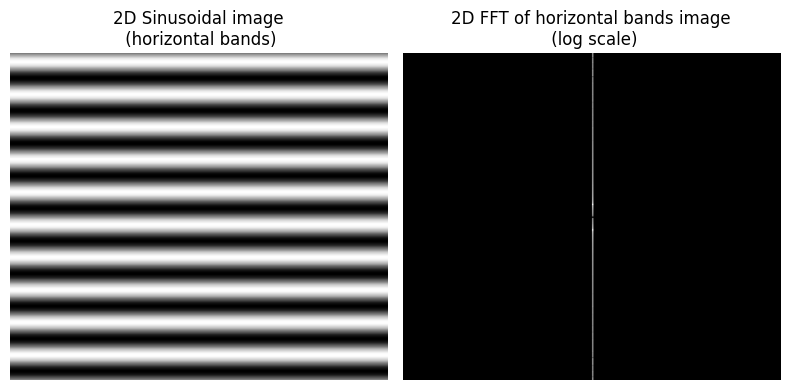

In [ ]:
# Load the image in grayscale
image_path = '/content/drive/MyDrive/PIM/Images/horizontal_bands.png'
horizontal_bands = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Subtract the mean before applying the FFT to remove the DC component
# to simulate a 2D sinusoidal wave without offset
horizontal_bands_mean_subtracted = horizontal_bands - np.mean(horizontal_bands)

# 2D FFT of the image with horizontal bands using cv2.dft (with datatype float32)
fft_2d = cv2.dft(np.float32(horizontal_bands_mean_subtracted), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center
fft_2d_shifted = np.fft.fftshift(fft_2d)

# Compute the magnitude of the complex result
# cv2.magnitude requires the real part and imaginary part
magnitude_spectrum = cv2.magnitude(fft_2d_shifted[:, :, 0], fft_2d_shifted[:, :, 1])

# Plotting the results
plt.figure(figsize=(8, 4))

# Plot the 2D sinusoidal image with horizontal bands
plt.subplot(1, 2, 1)
plt.imshow(cv2.normalize(horizontal_bands_mean_subtracted, None, 0, 255, cv2.NORM_MINMAX), cmap='gray', aspect='auto')
plt.title("2D Sinusoidal image\n (horizontal bands)")
plt.axis('off')

# Plot the 2D FFT of the sinusoidal image on a black background using a logarithmic scale
plt.subplot(1, 2, 2)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray', aspect='auto')
plt.title("2D FFT of horizontal bands image\n (log scale)")
plt.axis('off')

plt.tight_layout()
plt.show()

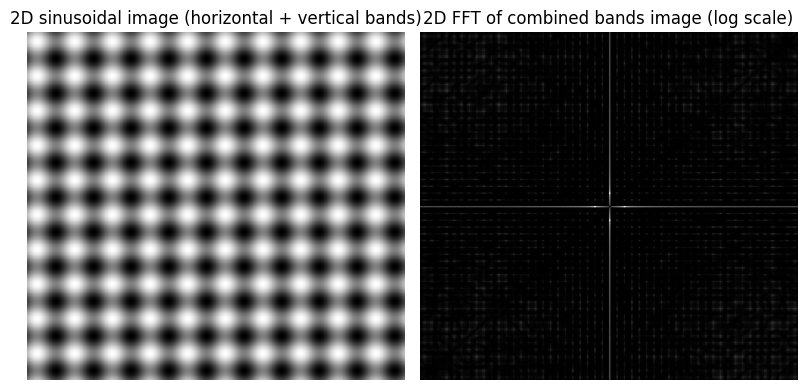

In [ ]:
# Load the image in grayscale
image_path = '/content/drive/MyDrive/PIM/Images/combined_bands.png'
combined_bands = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize the image to the range [-1, 1] to better represent the sinusoidal wave
combined_bands_normalized = cv2.normalize(combined_bands.astype('float32'), None, -1, 1, cv2.NORM_MINMAX)

# Subtract the mean to remove any DC component (average offset)
# (simulates the sum of vertical and horizontal bands without offset)
combined_bands_mean_subtracted = combined_bands_normalized - np.mean(combined_bands_normalized)

# 2D FFT of the mean-subtracted image with combined bands using cv2.dft (with datatype float32)
fft_2d = cv2.dft(np.float32(combined_bands_mean_subtracted), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center
fft_2d_shifted = np.fft.fftshift(fft_2d)

# Compute the magnitude of the complex result (real and imaginary parts)
magnitude_spectrum = cv2.magnitude(fft_2d_shifted[:, :, 0], fft_2d_shifted[:, :, 1])

# Plotting the results
plt.figure(figsize=(8, 4))

# Plot the 2D sinusoidal image with combined bands
plt.subplot(1, 2, 1)
plt.imshow(cv2.normalize(combined_bands_mean_subtracted, None, 0, 255, cv2.NORM_MINMAX), cmap='gray', aspect='auto')
plt.title("2D sinusoidal image (horizontal + vertical bands)")
plt.axis('off')

# Plot the 2D FFT of the sinusoidal image on a black background using a logarithmic scale
plt.subplot(1, 2, 2)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray', aspect='auto')
plt.title("2D FFT of combined bands image (log scale)")
plt.axis('off')

plt.tight_layout()
plt.show()

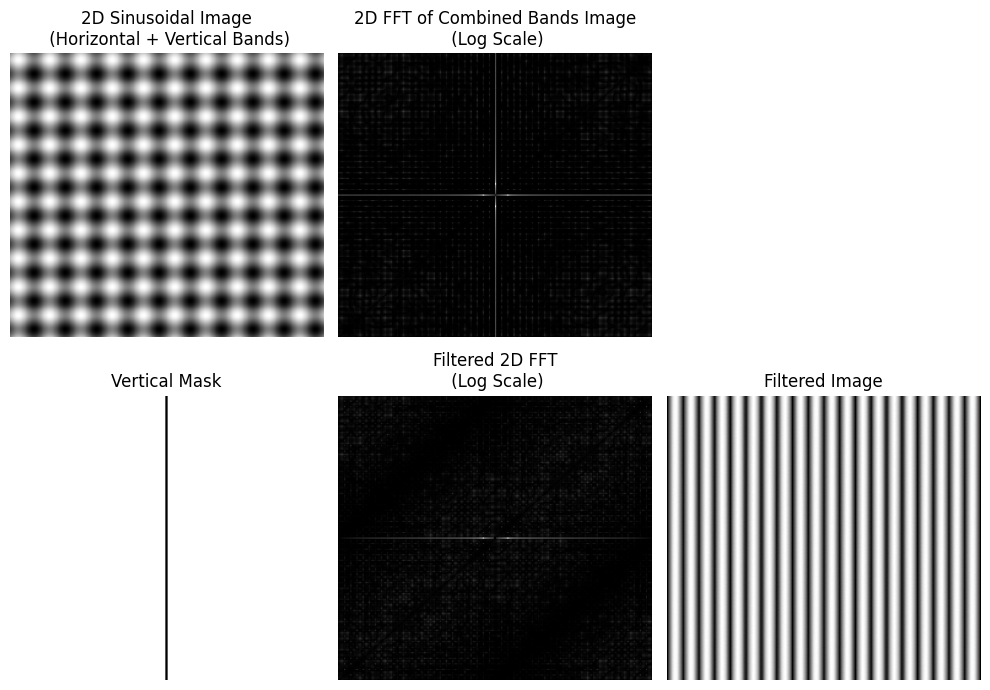

In [ ]:
## Loading the image

# Load the image in grayscale
image_path = '/content/drive/MyDrive/PIM/Images/combined_bands.png'
combined_bands = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize the image to the range [-1, 1] to better represent the sinusoidal wave
combined_bands_normalized = cv2.normalize(combined_bands.astype('float32'), None, -1, 1, cv2.NORM_MINMAX)

# Subtract the mean to remove any DC component (average offset)
# (simulates the sum of vertical and horizontal bands without offset)
combined_bands_mean_subtracted = combined_bands_normalized - np.mean(combined_bands_normalized)


## Computes the 2D FFT

# 2D FFT of the image with combined bands using cv2.dft (with datatype float32)
fft_2d = cv2.dft(np.float32(combined_bands_mean_subtracted), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center
fft_2d_shifted = np.fft.fftshift(fft_2d)


## Filtering

# Create a vertical mask to filter out the vertical frequency components
length = combined_bands.shape[0] # assume square image
mask = np.ones((length, length, 2), np.float32)
center_x = length // 2
mask[:, center_x-1:center_x+1] = 0  # Zero out the vertical frequencies around the center

# Apply the mask to the shifted FFT
filtered_fft = fft_2d_shifted * mask

# Shift back the filtered FFT
filtered_fft_shifted_back = np.fft.ifftshift(filtered_fft)


## Inverse FFT

# Inverse FFT to get the filtered image
filtered_image = cv2.idft(filtered_fft_shifted_back)
# Compute the magnitude of the complex result
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Compute the magnitude of the original 2D FFT
magnitude_spectrum = cv2.magnitude(fft_2d_shifted[:, :, 0], fft_2d_shifted[:, :, 1])

# Compute the magnitude of the filtered 2D FFT for visualization
filtered_magnitude_spectrum = cv2.magnitude(filtered_fft[:, :, 0], filtered_fft_shifted_back[:, :, 1])


## Visualization

# Plotting the results
plt.figure(figsize=(10, 7))

# Plot the 2D sinusoidal image with combined bands
plt.subplot(2, 3, 1)
plt.imshow(cv2.normalize(combined_bands_mean_subtracted, None, 0, 255, cv2.NORM_MINMAX), cmap='gray', aspect='auto')
plt.title("2D Sinusoidal Image\n (Horizontal + Vertical Bands)")
plt.axis('off')

# Plot the 2D FFT of the sinusoidal image on a black background using a logarithmic scale
plt.subplot(2, 3, 2)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray', aspect='auto')
plt.title("2D FFT of Combined Bands Image\n (Log Scale)")
plt.axis('off')

# Plot the vertical mask
plt.subplot(2, 3, 4)
plt.imshow(mask[:, :, 0], cmap='gray')
plt.title("Vertical Mask")
plt.axis('off')

# Plot the filtered 2D FFT (log scale) with adjusted contrast
plt.subplot(2, 3, 5)
plt.imshow(np.log1p(filtered_magnitude_spectrum), cmap='gray', aspect='auto')
plt.title("Filtered 2D FFT\n (Log Scale)")
plt.axis('off')

# Plot the resulting filtered image
plt.subplot(2, 3, 6)
plt.imshow(cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX), cmap='gray', aspect='auto')
plt.title("Filtered Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 7.- Image Enhancement Using Frequency Domain Filtering





### 7.1. Gaussian Low-Pass Filter (GLPF)

The Gaussian low-pass filter $H_{\text{low}}(u, v)$ is given by the expression:

$$H_{\text{LP}}(u, v) = e^{-\frac{D(u, v)^2}{2\sigma^2}}$$

where:

*	$u, v$ are the frequency coordinates in the frequency domain,
* $D(u, v)$ is the distance from the origin (the center of the frequency domain): $D(u, v) = \sqrt{(u - u_0)^2 + (v - v_0)^2}$, with  $u_0, v_0$  being the coordinates of the center of the frequency domain ($u_0 = 0$ ,  $v_0 = 0$  if the origin is at the center),
* $\sigma$ is the standard deviation of the Gaussian function, which controls the width of the passband (a larger $\sigma$  allows more high-frequency components to pass, resulting in less blurring).

This filter is **isotropic**, meaning that it applies the same filtering effect (**blurring or smoothing**) in all directions, making them **rotationally symmetric** in the frequency domain **without** introducing **directional artifacts**.

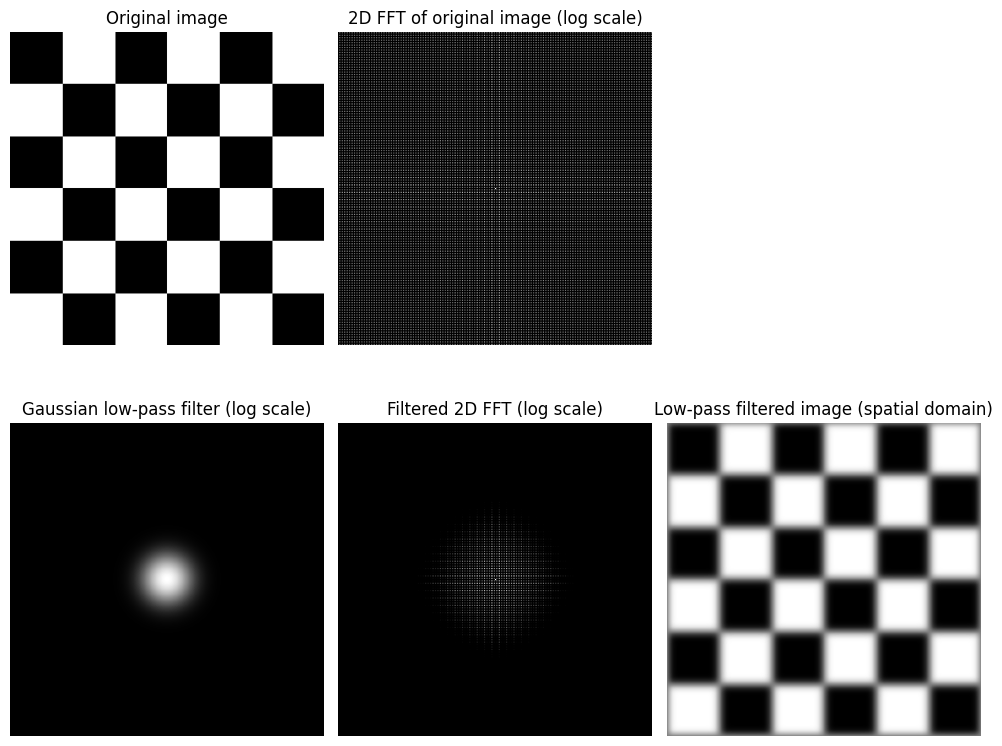

In [ ]:
# Create the 6x6 chessboard pattern
image = np.full((6, 6), 50, dtype=np.uint8)
image[1::2, ::2] = 200  # slicing rows [1, 3, 5, 7] and columns [0, 2, 4, 6]
image[::2, 1::2] = 200  # slicing rows [0, 2, 4, 6] and columns [1, 3, 5, 7]

# Resize the chessboard to a larger size (256x256) for better visualization
image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_NEAREST)

# Convert to float32 format before applying FFT
image = image.astype(np.float32)

# Step 1: Perform the 2D FFT on the image
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Step 2: Create a Gaussian low-pass filter

# Get the number of rows and columns in the image
rows, cols = image.shape

# Find the center of the image (where the low frequencies are located in the frequency domain)
crow, ccol = rows // 2, cols // 2

# Standard deviation (sigma) for the Gaussian filter
sigma = 0.1 # Smaller sigma values will allow fewer high frequencies to pass through

# Create coordinate grids (x, y) to calculate the distance from the center of the image in the frequency domain
# np.linspace generates evenly spaced numbers between -1 and 1
# For x, it results a grid of 'cols' points (256 columns); for y, 'rows' points (256 rows)
# np.meshgrid creates a grid of x and y coordinates
x, y = np.meshgrid(np.linspace(-1, 1, cols), np.linspace(-1, 1, rows))

# Calculate the Euclidean distance (d) from each point in the grid (x, y) to the center of the frequency domain (0, 0)
# For each point, the distance from the center is computed in terms of normalized coordinates (-1 to 1)
d = np.sqrt(x*x + y*y)  # Euclidean distance from the center for each point

# Create the Gaussian low-pass filter using the distance grid 'd' and the standard deviation 'sigma'
# Points closer to the center will have values close to 1 (low-pass), and points farther away will decrease towards 0
gaussian_low_pass = np.exp(-(d**2 / (2.0 * sigma**2)))

# Step 3: Apply the Gaussian filter in the frequency domain

# Separate the real and imaginary parts of the DFT
real_part = dft_shifted[:, :, 0]
imaginary_part = dft_shifted[:, :, 1]

# Apply the Gaussian filter separately to the real and imaginary parts as an element-wise multiplication
filtered_real = real_part * gaussian_low_pass
filtered_imaginary = imaginary_part * gaussian_low_pass

# Combine the filtered real and imaginary parts back together
filtered_dft = np.dstack((filtered_real, filtered_imaginary))

# Step 4: Shift back the filtered FFT
filtered_dft_shifted_back = np.fft.ifftshift(filtered_dft)

# Step 5: Perform the inverse FFT to get the filtered image

# 'filtered_image' is the spatial-domain complex, represented with 2 channels: real and imaginary parts
filtered_image = cv2.idft(filtered_dft_shifted_back)

# computes the magnitude of the spatial-domain filtered image (single-channel image, real-valued)
filtered_image_magnitude = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Step 8: Compute the magnitude of the 2D FFT for visualization (for the original image)
magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
filtered_magnitude_spectrum = cv2.magnitude(filtered_dft[:, :, 0], filtered_dft[:, :, 1])

# Step 9: Plot the results
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original image")
plt.axis('off')

# 2D FFT of the original image
plt.subplot(2, 3, 2)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.title("2D FFT of original image (log scale)")
plt.axis('off')

# Gaussian low-pass filter in the frequency domain
plt.subplot(2, 3, 4)
plt.imshow(np.log1p(gaussian_low_pass), cmap='gray')  # Log scale for better visualization
plt.title("Gaussian low-pass filter (log scale)")
plt.axis('off')

# Filtered 2D FFT (after applying Gaussian low-pass)
plt.subplot(2, 3, 5)
plt.imshow(np.log1p(filtered_magnitude_spectrum), cmap='gray')
plt.title("Filtered 2D FFT (log scale)")
plt.axis('off')

# Low-pass filtered image (back in the spatial domain)
plt.subplot(2, 3, 6)
plt.imshow(filtered_image_magnitude, cmap='gray')
plt.title("Low-pass filtered image (spatial domain)")
plt.axis('off')

plt.tight_layout()
plt.show()

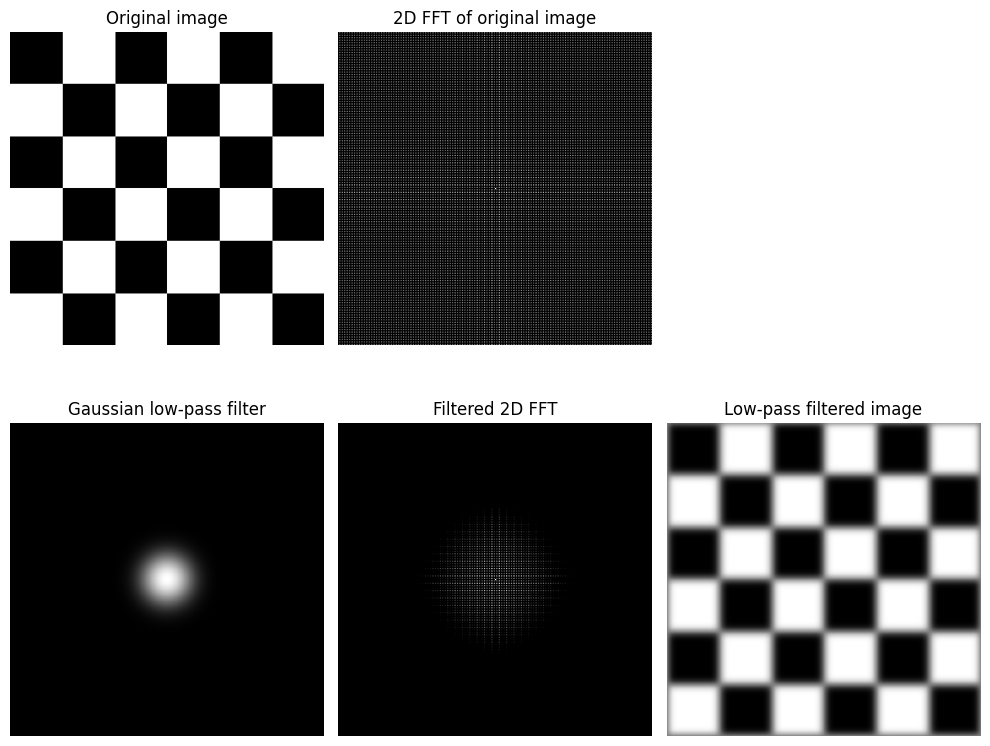

In [ ]:
# Function to create a Gaussian low-pass filter
def gaussian_low_pass_filter(rows, cols, sigma):
    x, y = np.meshgrid(np.linspace(-1, 1, cols), np.linspace(-1, 1, rows))
    d = np.sqrt(x**2 + y**2)
    return np.exp(-(d**2 / (2.0 * sigma**2)))

# Step 1: Prepare the image (create a 6x6 chessboard pattern and resize to 256x256)
image = np.full((6, 6), 50, dtype=np.uint8)
image[1::2, ::2] = 200
image[::2, 1::2] = 200
image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_NEAREST)
image = image.astype(np.float32) # Convert to float32 format before applying FFT

# Step 2: Perform 2D FFT and shift
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Step 3: Create Gaussian low-pass filter
rows, cols = image.shape # Get image dimensions
sigma = 0.1
gaussian_low_pass = gaussian_low_pass_filter(rows, cols, sigma)

# Step 4: Apply the Gaussian low-pass filter to the real and imaginary parts of the DFT
real_part = dft_shifted[:, :, 0] * gaussian_low_pass
imaginary_part = dft_shifted[:, :, 1] * gaussian_low_pass
filtered_dft = np.dstack((real_part, imaginary_part)) # combines the real and imaginary parts

# Step 5: Shift back and compute the inverse FFT
filtered_dft_shifted_back = np.fft.ifftshift(filtered_dft)
filtered_image = cv2.idft(filtered_dft_shifted_back)
filtered_image_magnitude = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Step 6: Compute the magnitude of the original and filtered 2D FFTs
magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
filtered_magnitude_spectrum = cv2.magnitude(filtered_dft[:, :, 0], filtered_dft[:, :, 1])

# Step 7: Plot the results
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original image")
plt.axis('off')

# 2D FFT of the original image
plt.subplot(2, 3, 2)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.title("2D FFT of original image")
plt.axis('off')

# Gaussian low-pass filter
plt.subplot(2, 3, 4)
plt.imshow(np.log1p(gaussian_low_pass), cmap='gray')
plt.title("Gaussian low-pass filter")
plt.axis('off')

# Filtered 2D FFT
plt.subplot(2, 3, 5)
plt.imshow(np.log1p(filtered_magnitude_spectrum), cmap='gray')
plt.title("Filtered 2D FFT")
plt.axis('off')

# Low-pass filtered image
plt.subplot(2, 3, 6)
plt.imshow(filtered_image_magnitude, cmap='gray')
plt.title("Low-pass filtered image")
plt.axis('off')

plt.tight_layout()
plt.show()

### 7.2. Gaussian High-Pass Filter (GHPF)

A Gaussian high-pass filter $H_{\text{HP}}(u, v)$ allows high-frequency components to pass through while attenuating low-frequency components, with the effect of **enhancing sharp transitions** and **detecting edges**.

It can be derived from the Gaussian low-pass filter by subtracting the low-pass filter from 1:

$$H_{\text{HP}}(u, v) = 1 - e^{-\frac{D(u, v)^2}{2\sigma^2}}$$

where:

* $H_{\text{HP}}(u, v)$ is the complement of the Gaussian low-pass filter.
* $D(u, v)$  and $\sigma$ have the same meanings as in the low-pass filter.

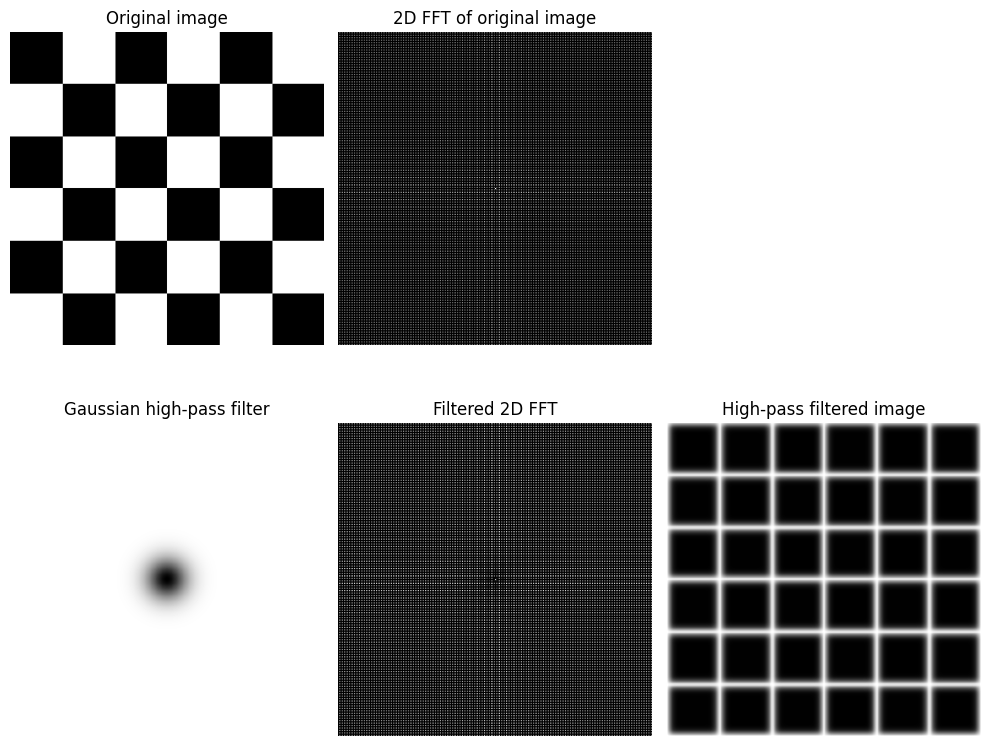

In [ ]:
# Function to create a Gaussian high-pass filter
def gaussian_high_pass_filter(rows, cols, sigma):
    x, y = np.meshgrid(np.linspace(-1, 1, cols), np.linspace(-1, 1, rows))
    d = np.sqrt(x * x + y * y)
    low_pass = np.exp(-(d**2 / (2.0 * sigma**2)))
    return 1 - low_pass  # Inverse of the low-pass filter to get the high-pass

# Step 1: Prepare the image (create a 6x6 chessboard pattern and resize to 256x256)
image = np.full((6, 6), 50, dtype=np.uint8)
image[1::2, ::2] = 200
image[::2, 1::2] = 200
image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_NEAREST)
image = image.astype(np.float32) # Convert to float32 format before applying FFT

# Step 2: Perform 2D FFT and shift
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Step 3: Create Gaussian high-pass filter
rows, cols = image.shape
sigma = 0.1
gaussian_high_pass = gaussian_high_pass_filter(rows, cols, sigma)

# Step 4: Apply the Gaussian high-pass filter to the real and imaginary parts of the DFT
real_part = dft_shifted[:, :, 0] * gaussian_high_pass
imaginary_part = dft_shifted[:, :, 1] * gaussian_high_pass
filtered_dft = np.dstack((real_part, imaginary_part))

# Step 5: Shift back and compute the inverse FFT
filtered_dft_shifted_back = np.fft.ifftshift(filtered_dft)
filtered_image = cv2.idft(filtered_dft_shifted_back)
filtered_image_magnitude = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Step 6: Compute the magnitude of the original and filtered 2D FFTs
magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
filtered_magnitude_spectrum = cv2.magnitude(filtered_dft[:, :, 0], filtered_dft[:, :, 1])

# Step 7: Plot the results
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original image")
plt.axis('off')

# 2D FFT of the original image
plt.subplot(2, 3, 2)
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.title("2D FFT of original image")
plt.axis('off')

# Gaussian high-pass filter
plt.subplot(2, 3, 4)
plt.imshow(np.log1p(gaussian_high_pass), cmap='gray')
plt.title("Gaussian high-pass filter")
plt.axis('off')

# Filtered 2D FFT
plt.subplot(2, 3, 5)
plt.imshow(np.log1p(filtered_magnitude_spectrum), cmap='gray')
plt.title("Filtered 2D FFT")
plt.axis('off')

# High-pass filtered image
plt.subplot(2, 3, 6)
plt.imshow(filtered_image_magnitude, cmap='gray')
plt.title("High-pass filtered image")
plt.axis('off')

plt.tight_layout()
plt.show()

### 7.3. High-Frequency Emphasis Filtering

High-frequency emphasis filtering is a frequency domain technique that **enhances the high-frequency components** of an image (like edges and fine details) **while still retaining some of the low-frequency information** (which corresponds to the overall structure and smooth regions).

High-frequency emphasis filtering can be defined as a **combination of the original image and a high-pass filtered version** of the image:

$$H_{\text{emphasis}}(u, v) = k_1 \cdot H_{\text{original}}(u, v) + k_2 \cdot H_{\text{HP}}(u, v)$$

where:

* $H_{\text{emphasis}}(u, v)$ is the high-frequency emphasis filter applied in the frequency domain,
* $H_{\text{original}}(u, v)$ is the frequency spectrum of the original image,
* $H_{\text{HP}}(u, v)$ is the high-pass filter applied to the frequency domain image,
* $k_1$ and $k_2$ are weighting constants:
	* $k_1$: controls how much of the low-frequency content (original image) is retained,
	* $k_2$: controls how much of the high-frequency content (edges and fine details) is emphasized.

Typically, $k_1$ is between 0.1 and 1, and $k_2$ is between 0.5 and 1.5.

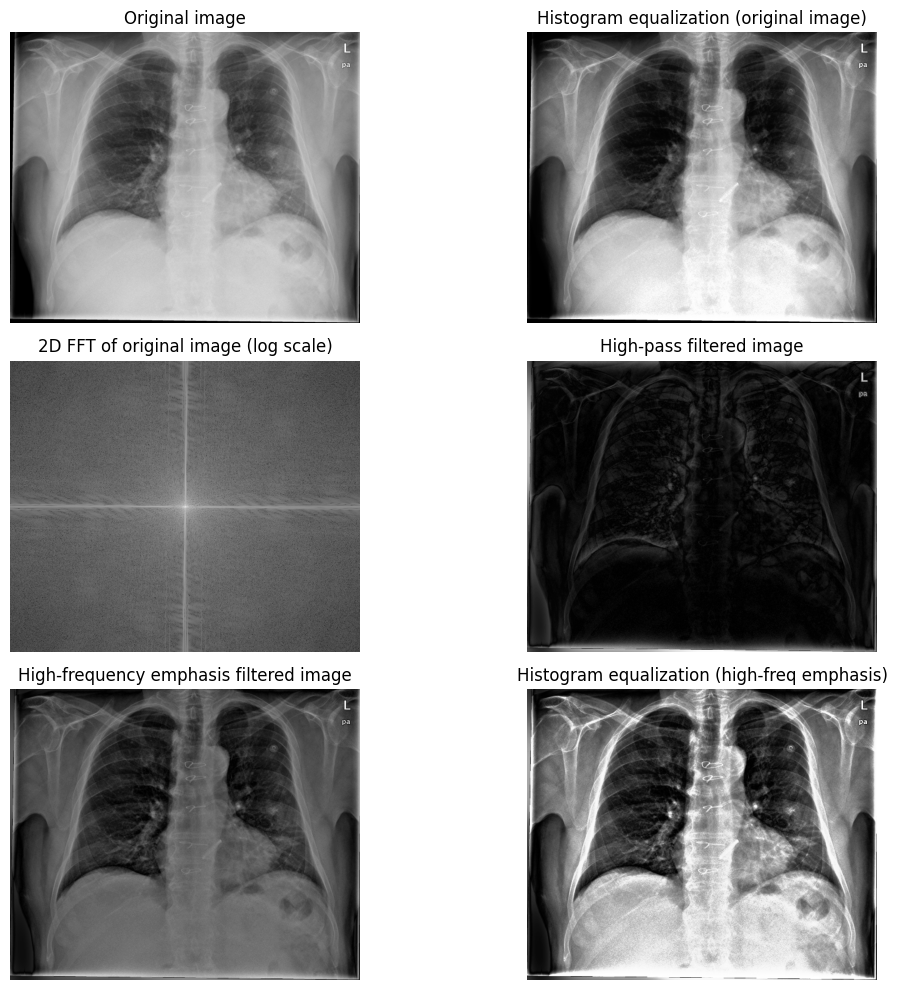

In [ ]:
# Define the Gaussian high-pass filter as a function
def gaussian_high_pass_filter(rows, cols, sigma):
    x, y = np.meshgrid(np.linspace(-1, 1, cols), np.linspace(-1, 1, rows)) # Create coordinate grids (x, y)
    d = np.sqrt(x * x + y * y)  # Euclidean distance from the center for each point
    low_pass = np.exp(-(d**2 / (2.0 * sigma**2))) # Create the Gaussian low-pass filter
    gaussian_high_pass = 1 - low_pass  # Inverse of the low-pass filter
    return gaussian_high_pass

# Step 1: Load the image
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32) # Convert to float32 format before applying FFT

# Step 2: Perform the 2D FFT on the image
dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Step 3: Create Gaussian high-pass filter
rows, cols = image.shape # Get the number of rows and columns in the image
sigma = 0.02  # Standard deviation (controls the sharpness of the filter)
gaussian_high_pass = gaussian_high_pass_filter(rows, cols, sigma)

# Step 4: Apply the Gaussian high-pass filter in the frequency domain
filtered_real_high_pass = dft_shifted[:, :, 0] * gaussian_high_pass
filtered_imaginary_high_pass = dft_shifted[:, :, 1] * gaussian_high_pass
filtered_dft_high_pass = np.dstack((filtered_real_high_pass, filtered_imaginary_high_pass))

# Step 5: High-frequency emphasis filter calculation
k1, k2 = 0.5, 0.75  # k1: weight for the original image; k2: weight for the high-pass filter
emphasis_real = k1 * dft_shifted[:, :, 0] + k2 * filtered_real_high_pass
emphasis_imaginary = k1 * dft_shifted[:, :, 1] + k2 * filtered_imaginary_high_pass
filtered_dft_emphasis = np.dstack((emphasis_real, emphasis_imaginary))

# Step 6: Shift back the filtered FFTs and compute the inverse FFTs
filtered_dft_high_pass_shifted_back = np.fft.ifftshift(filtered_dft_high_pass)
filtered_image_high_pass = cv2.idft(filtered_dft_high_pass_shifted_back)
filtered_image_magnitude_high_pass = cv2.magnitude(filtered_image_high_pass[:, :, 0], filtered_image_high_pass[:, :, 1])
filtered_dft_emphasis_shifted_back = np.fft.ifftshift(filtered_dft_emphasis)
filtered_image_emphasis = cv2.idft(filtered_dft_emphasis_shifted_back)
filtered_image_magnitude_emphasis = cv2.magnitude(filtered_image_emphasis[:, :, 0], filtered_image_emphasis[:, :, 1])

# Step 7: Compute the magnitude of the 2D FFTs for visualization
magnitude_spectrum_original = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
magnitude_spectrum_high_pass = cv2.magnitude(filtered_dft_high_pass[:, :, 0], filtered_dft_high_pass[:, :, 1])
magnitude_spectrum_emphasis = cv2.magnitude(filtered_dft_emphasis[:, :, 0], filtered_dft_emphasis[:, :, 1])

# Step 8: Normalize filtered images to [0, 255] before applying histogram equalization
filtered_image_magnitude_high_pass = cv2.normalize(filtered_image_magnitude_high_pass, None, 0, 255, cv2.NORM_MINMAX)
filtered_image_magnitude_emphasis = cv2.normalize(filtered_image_magnitude_emphasis, None, 0, 255, cv2.NORM_MINMAX)

# Step 9: Apply histogram equalization to the high-pass and high-frequency emphasis filtered images
original_image_eq = cv2.equalizeHist(np.uint8(image))
filtered_image_emphasis_eq = cv2.equalizeHist(np.uint8(filtered_image_magnitude_emphasis))

# Step 10: Plot the results in a 3x2 subplot layout
plt.figure(figsize=(12, 10))

# Original image
plt.subplot(3, 2, 1)
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.title("Original image")
plt.axis('off')

# Histogram equalization of the high-pass filtered image
plt.subplot(3, 2, 2)
plt.imshow(original_image_eq, cmap='gray')
plt.title("Histogram equalization (original image)")
plt.axis('off')

# 2D FFT of the original image
plt.subplot(3, 2, 3)
plt.imshow(np.log1p(magnitude_spectrum_original), cmap='gray')
plt.title("2D FFT of original image (log scale)")
plt.axis('off')

# High-pass filtered image
plt.subplot(3, 2, 4)
plt.imshow(np.uint8(filtered_image_magnitude_high_pass), cmap='gray')
plt.title("High-pass filtered image")
plt.axis('off')

# High-pass emphasis filtered image
plt.subplot(3, 2, 5)
plt.imshow(np.uint8(filtered_image_magnitude_emphasis), cmap='gray')
plt.title("High-frequency emphasis filtered image")
plt.axis('off')

# Histogram equalization of the high-pass emphasis filtered image
plt.subplot(3, 2, 6)
plt.imshow(filtered_image_emphasis_eq, cmap='gray')
plt.title("Histogram equalization (high-freq emphasis)")
plt.axis('off')

plt.tight_layout()
plt.show()

### 7.4. Butterworth Low-Pass and High-Pass Filters

The Butterworth filter is commonly used in image processing to perform **low-pass or high-pass filtering**. It is characterized by the following properties:

* A **cutoff frequency** that defines the point where the filter begins to attenuate frequencies.

* A **smooth transition** between passing and attenuating frequencies, controlled by the **filter's order** (higher order gives a steeper transition).

**Butterworth Low-Pass Filter (LPF)**

The Butterworth low-pass filter allows low-frequency components to pass through while attenuating higher frequencies. The formula for the low-pass Butterworth filter for images is:

$$H_{\text{LP}}(u, v) = \frac{1}{1 + \left( \frac{D(u, v)}{D_0} \right)^{2n}}$$

where:

* $H(u, v)$ is the filter in the frequency domain,
* $D(u, v)$ is the distance from the center of the frequency domain to the point $(u, v)$, computed as $D(u, v) = \sqrt{(u - u_0)^2 + (v - v_0)^2}$, where $(u_0, v_0)$ is the center of the frequency domain,
* $D_0$ is the cutoff frequency that defines the radius within which frequencies are passed through,
* $n$ is the order of the filter; a higher order means a steeper cutoff.

**Butterworth High-Pass Filter (HPF)**

The Butterworth high-pass filter allows high-frequency components to pass while attenuating lower frequencies. It is expressed as:

$$H_{\text{HP}}(u, v) = \frac{1}{1 + \left( \frac{D_0}{D(u, v)} \right)^{2n}}$$

where:

* The terms are the same as for the low-pass filter, except the roles of $D(u, v)$ and $D_0$ are reversed to create a high-pass behavior.

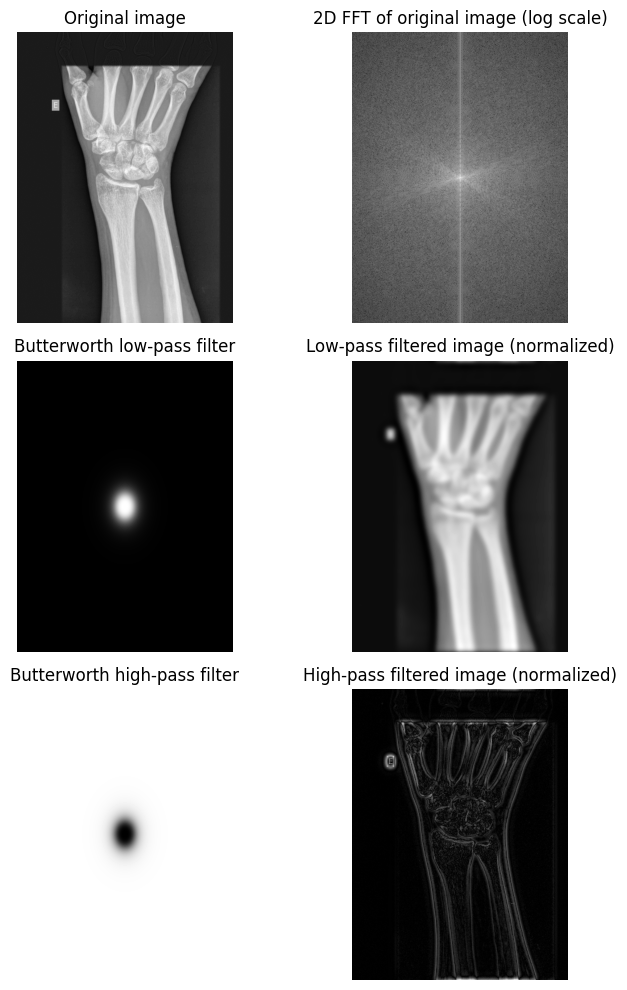

In [ ]:
# Butterworth low-pass filter
def butterworth_low_pass(rows, cols, cutoff, order):
    x, y = np.meshgrid(np.linspace(-1, 1, cols), np.linspace(-1, 1, rows))  # Create a meshgrid
    d = np.sqrt(x**2 + y**2)  # Distance from the center
    H = 1 / (1 + (d / cutoff)**(2 * order))  # Low-pass filter formula
    return H

# Butterworth high-pass filter
def butterworth_high_pass(rows, cols, cutoff, order):
    x, y = np.meshgrid(np.linspace(-1, 1, cols), np.linspace(-1, 1, rows))  # Create a meshgrid
    d = np.sqrt(x**2 + y**2)  # Distance from the center
    H = 1 / (1 + (cutoff / d)**(2 * order))  # High-pass filter formula
    return H

# Step 1: Load the image
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_2.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)  # Convert to float32 format before applying FFT

# Step 2: Perform the 2D FFT on the image
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Step 3: Create the Butterworth filters
cutoff = 0.1  # Cutoff frequency (in normalized units)
order = 2  # Order of the Butterworth filter (higher values = sharper cutoff)
rows, cols = image.shape
butterworth_low_pass_filter = butterworth_low_pass(rows, cols, cutoff, order)
butterworth_high_pass_filter = butterworth_high_pass(rows, cols, cutoff, order)

# Step 4: Apply the Butterworth filters in the frequency domain
# Low-pass filter
filtered_real_low_pass = dft_shifted[:, :, 0] * butterworth_low_pass_filter
filtered_imaginary_low_pass = dft_shifted[:, :, 1] * butterworth_low_pass_filter
filtered_dft_low_pass = np.dstack((filtered_real_low_pass, filtered_imaginary_low_pass))
# High-pass filter
filtered_real_high_pass = dft_shifted[:, :, 0] * butterworth_high_pass_filter
filtered_imaginary_high_pass = dft_shifted[:, :, 1] * butterworth_high_pass_filter
filtered_dft_high_pass = np.dstack((filtered_real_high_pass, filtered_imaginary_high_pass))

# Step 5: Shift back both filtered FFTs and compute the inverse FFTs
# Low-pass filter
filtered_dft_low_pass_shifted_back = np.fft.ifftshift(filtered_dft_low_pass)
filtered_image_low_pass = cv2.idft(filtered_dft_low_pass_shifted_back)
# High-pass filter
filtered_dft_high_pass_shifted_back = np.fft.ifftshift(filtered_dft_high_pass)
filtered_image_high_pass = cv2.idft(filtered_dft_high_pass_shifted_back)

# Step 6: Compute the magnitude of the original and filtered images
magnitude_spectrum_original = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
filtered_image_magnitude_low_pass = cv2.magnitude(filtered_image_low_pass[:, :, 0], filtered_image_low_pass[:, :, 1])
filtered_image_magnitude_high_pass = cv2.magnitude(filtered_image_high_pass[:, :, 0], filtered_image_high_pass[:, :, 1])

# Step 7: Plot the results
plt.figure(figsize=(8, 10))

# Original image
plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original image")
plt.axis('off')

# 2D FFT of the original image
plt.subplot(3, 2, 2)
plt.imshow(np.log1p(magnitude_spectrum_original), cmap='gray')
plt.title("2D FFT of original image (log scale)")
plt.axis('off')

# Butterworth Low-pass filter
plt.subplot(3, 2, 3)
plt.imshow(butterworth_low_pass_filter, cmap='gray')
plt.title("Butterworth low-pass filter")
plt.axis('off')

# Low-pass filtered image (normalized)
plt.subplot(3, 2, 4)
plt.imshow(np.uint8(cv2.normalize(filtered_image_magnitude_low_pass, None, 0, 255, cv2.NORM_MINMAX)), cmap='gray')
plt.title("Low-pass filtered image (normalized)")
plt.axis('off')

# Butterworth High-pass filter
plt.subplot(3, 2, 5)
plt.imshow(butterworth_high_pass_filter, cmap='gray')
plt.title("Butterworth high-pass filter")
plt.axis('off')

# High-pass filtered image (normalized)
plt.subplot(3, 2, 6)
plt.imshow(np.uint8(cv2.normalize(filtered_image_magnitude_high_pass, None, 0, 255, cv2.NORM_MINMAX)), cmap='gray')
plt.title("High-pass filtered image (normalized)")
plt.axis('off')

plt.tight_layout()
plt.show()

### 7.5. Band-Pass Filter

A band-pass filter in the frequency domain **allows frequencies within a specific range** (between a low-frequency cutoff and a high-frequency cutoff), called the **passband**, to pass through, while **blocking or attenuating** frequencies below the lower cutoff and above the higher cutoff.

It is commonly used in image and signal processing to **isolate certain features or remove unwanted frequencies**.

A band-pass filter is built using a **combination of low-pass and high-pass filters**. The low-pass filter removes high frequencies, and the high-pass filter removes low frequencies, leaving a band of frequencies in the middle.

The band-pass filter has **two** main **parameters**:

* **Low cutoff frequency** ($f_{\text{low}}$): frequencies below this value are removed.
* **High cutoff frequency** ($f_{\text{high}}$): frequencies above this value are also removed.

#### Gaussian band-pass filter

A Gaussian band-pass filter is created by **multiplying** a Gaussian low-pass filter and a complementary high-pass filter. The band-pass filter only allows **frequencies between certain cutoff values** to pass through.

The general form for a Gaussian band-pass filter is:

$$H_{\text{BP}}(u, v) = e^{-\frac{(D(u, v) - D_0)^2}{2\sigma^2}}$$

where:

* $H_{\text{BP}}(u, v)$ is the transfer function of the Gaussian band-pass filter,
*	$D(u, v)$ is the distance from the center of the frequency domain to the point $(u, v)$, calculated as $D(u, v) = \sqrt{u^2 + v^2}$,
* $D_0$ is the center frequency of the pass-band (this represents the middle of the frequencies that are allowed to pass),
* $\sigma$ is the standard deviation, which controls the bandwidth of the filter (smaller $\sigma$ values result in a narrower band).

This filter will allow frequencies around $D_0$ to pass while attenuating frequencies far from $D_0$.

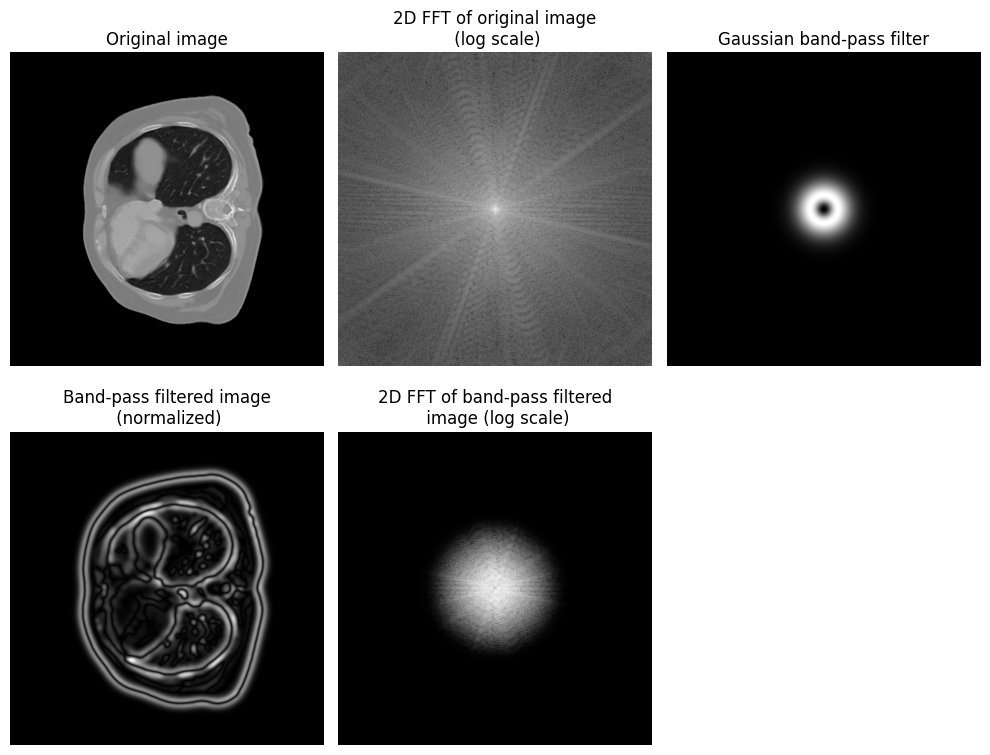

In [ ]:
# Gaussian low-pass filter
def gaussian_low_pass(rows, cols, cutoff):
    x, y = np.meshgrid(np.linspace(-1, 1, cols), np.linspace(-1, 1, rows))
    d = np.sqrt(x**2 + y**2)  # Distance from the center
    H = np.exp(-(d**2) / (2 * (cutoff**2)))  # Gaussian low-pass filter formula
    return H

# Gaussian high-pass filter
def gaussian_high_pass(rows, cols, cutoff):
    low_pass = gaussian_low_pass(rows, cols, cutoff)
    return 1 - low_pass  # Gaussian high-pass filter is 1 - low-pass filter

# Gaussian band-pass filter
def gaussian_band_pass(rows, cols, low_cutoff, high_cutoff):
    low_pass = gaussian_low_pass(rows, cols, high_cutoff)
    high_pass = gaussian_high_pass(rows, cols, low_cutoff)
    band_pass = low_pass * high_pass  # Multiply the low-pass and high-pass filters
    return band_pass

# Load the image
image_path = '/content/drive/MyDrive/PIM/Images/CT_slice_0108.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)  # Convert to float32 format before applying FFT

# Perform the 2D FFT on the image
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Create the Gaussian band-pass filter
low_cutoff = 0.05  # Low cutoff frequency (in normalized units)
high_cutoff = 0.1  # High cutoff frequency (in normalized units)
rows, cols = image.shape  # Rows and columns of the image
gaussian_band_pass_filter = gaussian_band_pass(rows, cols, low_cutoff, high_cutoff)

# Apply the Gaussian band-pass filter in the frequency domain
filtered_real_band_pass = dft_shifted[:, :, 0] * gaussian_band_pass_filter
filtered_imaginary_band_pass = dft_shifted[:, :, 1] * gaussian_band_pass_filter
filtered_dft_band_pass = np.dstack((filtered_real_band_pass, filtered_imaginary_band_pass))

# Shift back the filtered FFT and compute the inverse FFT
filtered_dft_band_pass_shifted_back = np.fft.ifftshift(filtered_dft_band_pass)
filtered_image_band_pass = cv2.idft(filtered_dft_band_pass_shifted_back)
filtered_image_magnitude_band_pass = cv2.magnitude(filtered_image_band_pass[:, :, 0], filtered_image_band_pass[:, :, 1])

# Compute the magnitude of the 2D FFT for the original and filtered images
magnitude_spectrum_original = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
filtered_dft_band_pass_magnitude = cv2.magnitude(filtered_dft_band_pass[:, :, 0], filtered_dft_band_pass[:, :, 1])

# Plot the results
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(np.uint8(image), cmap='gray')
plt.title("Original image")
plt.axis('off')

# 2D FFT of the original image (log scale)
plt.subplot(2, 3, 2)
plt.imshow(np.log1p(magnitude_spectrum_original), cmap='gray')
plt.title("2D FFT of original image\n (log scale)")
plt.axis('off')

# Gaussian Band-pass filter
plt.subplot(2, 3, 3)
plt.imshow(gaussian_band_pass_filter, cmap='gray')
plt.title("Gaussian band-pass filter")
plt.axis('off')

# Band-pass filtered image (normalized)
plt.subplot(2, 3, 4)
plt.imshow(cv2.normalize(filtered_image_magnitude_band_pass, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8), cmap='gray')
plt.title("Band-pass filtered image\n (normalized)")
plt.axis('off')

# 2D FFT of the band-pass filtered image (log scale)
plt.subplot(2, 3, 5)
plt.imshow(np.log1p(filtered_dft_band_pass_magnitude), cmap='gray')
plt.title("2D FFT of band-pass filtered\n image (log scale)")
plt.axis('off')

plt.tight_layout()
plt.show()

#### Butterworth band-pass filter

A Butterworth band-pass filter is created by **combining** a Butterworth low-pass filter and a Butterworth high-pass filter. This allows frequencies between two cutoff values to pass through, while frequencies outside this range are attenuated.

The general form for a Butterworth band-pass filter is:

$$
H_{\text{BP}}(u, v) = \frac{1}{1 + \left(\frac{D(u, v)D_0}{(D^2(u, v) - D_{\text{LP}}^2)(D_{\text{HP}}^2 - D^2(u, v))}\right)^{2n}}
$$

where:

*	$H_{\text{BP}}(u, v)$ is the transfer function of the Butterworth band-pass filter,
*	$D(u, v)$ is the distance from the center of the frequency domain to the point $(u, v)$,
* $D_{\text{LP}}$ is the low cutoff frequency, below which frequencies are attenuated,
* $D_{\text{HP}}$ is the high cutoff frequency, above which frequencies are attenuated,
* $n$ is the order of the Butterworth filter, controlling the sharpness of the cutoff (as the order $n$ increases, the transition between passing and attenuated frequencies becomes sharper).

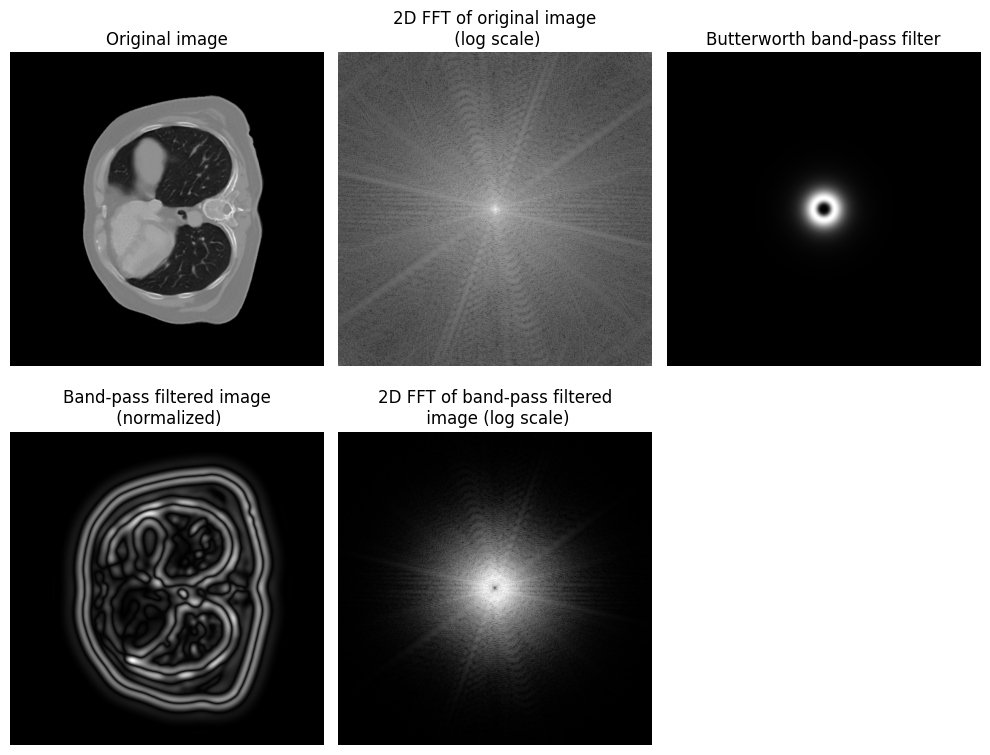

In [ ]:
# Butterworth low-pass filter
def butterworth_low_pass(rows, cols, cutoff, order):
    x, y = np.meshgrid(np.linspace(-1, 1, cols), np.linspace(-1, 1, rows))
    d = np.sqrt(x**2 + y**2)  # Distance from the center
    H = 1 / (1 + (d / cutoff)**(2 * order))  # Low-pass filter formula
    return H

# Butterworth high-pass filter
def butterworth_high_pass(rows, cols, cutoff, order):
    x, y = np.meshgrid(np.linspace(-1, 1, cols), np.linspace(-1, 1, rows))
    d = np.sqrt(x**2 + y**2)  # Distance from the center
    H = 1 / (1 + (cutoff / d)**(2 * order))  # High-pass filter formula
    return H

# Butterworth band-pass filter
def butterworth_band_pass(rows, cols, low_cutoff, high_cutoff, order):
    low_pass = butterworth_low_pass(rows, cols, high_cutoff, order)
    high_pass = butterworth_high_pass(rows, cols, low_cutoff, order)
    band_pass = low_pass * high_pass
    return band_pass

# Load the image
image_path = '/content/drive/MyDrive/PIM/Images/CT_slice_0108.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)  # Convert to float32 format before applying FFT

# Perform the 2D FFT on the image
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Create the Butterworth band-pass filter
low_cutoff = 0.05  # Low cutoff frequency (in normalized units)
high_cutoff = 0.1  # High cutoff frequency (in normalized units)
order = 2  # Order of the Butterworth filter
rows, cols = image.shape  # Rows and columns of the image
butterworth_band_pass_filter = butterworth_band_pass(rows, cols, low_cutoff, high_cutoff, order)

# Apply the Butterworth band-pass filter in the frequency domain
filtered_real_band_pass = dft_shifted[:, :, 0] * butterworth_band_pass_filter
filtered_imaginary_band_pass = dft_shifted[:, :, 1] * butterworth_band_pass_filter
filtered_dft_band_pass = np.dstack((filtered_real_band_pass, filtered_imaginary_band_pass))

# Shift back the filtered FFT and compute the inverse FFT
filtered_dft_band_pass_shifted_back = np.fft.ifftshift(filtered_dft_band_pass)
filtered_image_band_pass = cv2.idft(filtered_dft_band_pass_shifted_back)
filtered_image_magnitude_band_pass = cv2.magnitude(filtered_image_band_pass[:, :, 0], filtered_image_band_pass[:, :, 1])

# Compute the magnitude of the 2D FFT for the original and filtered images
magnitude_spectrum_original = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
filtered_dft_band_pass_magnitude = cv2.magnitude(filtered_dft_band_pass[:, :, 0], filtered_dft_band_pass[:, :, 1])

# Plot the results
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(np.uint8(image), cmap='gray')
plt.title("Original image")
plt.axis('off')

# 2D FFT of the original image (log scale)
plt.subplot(2, 3, 2)
plt.imshow(np.log1p(magnitude_spectrum_original), cmap='gray')
plt.title("2D FFT of original image\n (log scale)")
plt.axis('off')

# Butterworth Band-pass filter
plt.subplot(2, 3, 3)
plt.imshow(butterworth_band_pass_filter, cmap='gray')
plt.title("Butterworth band-pass filter")
plt.axis('off')

# Band-pass filtered image (normalized)
plt.subplot(2, 3, 4)
plt.imshow(cv2.normalize(filtered_image_magnitude_band_pass, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8), cmap='gray')
plt.title("Band-pass filtered image\n (normalized)")
plt.axis('off')

# 2D FFT of the band-pass filtered image (log scale)
plt.subplot(2, 3, 5)
plt.imshow(np.log1p(filtered_dft_band_pass_magnitude), cmap='gray')
plt.title("2D FFT of band-pass filtered\n image (log scale)")
plt.axis('off')

plt.tight_layout()
plt.show()

### 7.6. Notch filter

Notch filters are specialized frequency filters used to **selectively remove or attenuate specific frequency components** in an image.

They are  useful in addressing **periodic noise or artifacts** that appear as distinct spikes or lines in the frequency domain representation of an image.

A notch-pass filter can be obtained from a band-pass filter using:

$$H_{\text{NP}}(u, v) = 1 - H_{\text{BP}}(u, v)$$

where $H_{\text{NP}}(u, v)$ and $H_{\text{BP}}(u, v)$ are the notch-pass and band-pass filters, respectively.


#### **Gaussian notch filter**

A Gaussian notch filter is designed to remove a specific range of frequencies around a given location. The filter can be expressed as the **product of two Gaussian filters** that “notch out” the unwanted frequency and its symmetric counterpart in the Fourier domain.

Let $D_1(u, v)$ and $D_2(u, v)$  be the Euclidean distances from the point $(u, v)$ in the frequency domain to the two symmetric notch points $(u_0, v_0)$ and $(-u_0, -v_0)$, respectively. The mathematical expression for a Gaussian notch filter is:

$$H_{\text{NP}}(u, v) = 1 - e^{- \frac{1}{2} \left( \frac{D_1(u, v) \cdot D_2(u, v)}{D_0^2} \right)}$$

where:

* $D_1(u, v)$ is the distance from the point $(u, v)$ to the notch location $(u_1, v_1)$, computed as $D_1(u, v) = \sqrt{(u - u_1)^2 + (v - v_1)^2}$,
* $(u_1, v_1)$ is the location of the first frequency to be removed (a notch point),
* $D_2(u, v)$ is the distance from the point $(u, v)$ to the symmetric notch location $(u_2, v_2)$, computed similarly as $D_2(u, v) = \sqrt{(u - u_2)^2 + (v - v_2)^2}$,
* $(u_2, v_2)$ is the location of the second notch point (mirrored frequency component),
* $D_0$ is the cutoff frequency, controlling the width of the notch; it represents the size of the notch around $(u_1, v_1)$  and $(u_2, v_2)$.



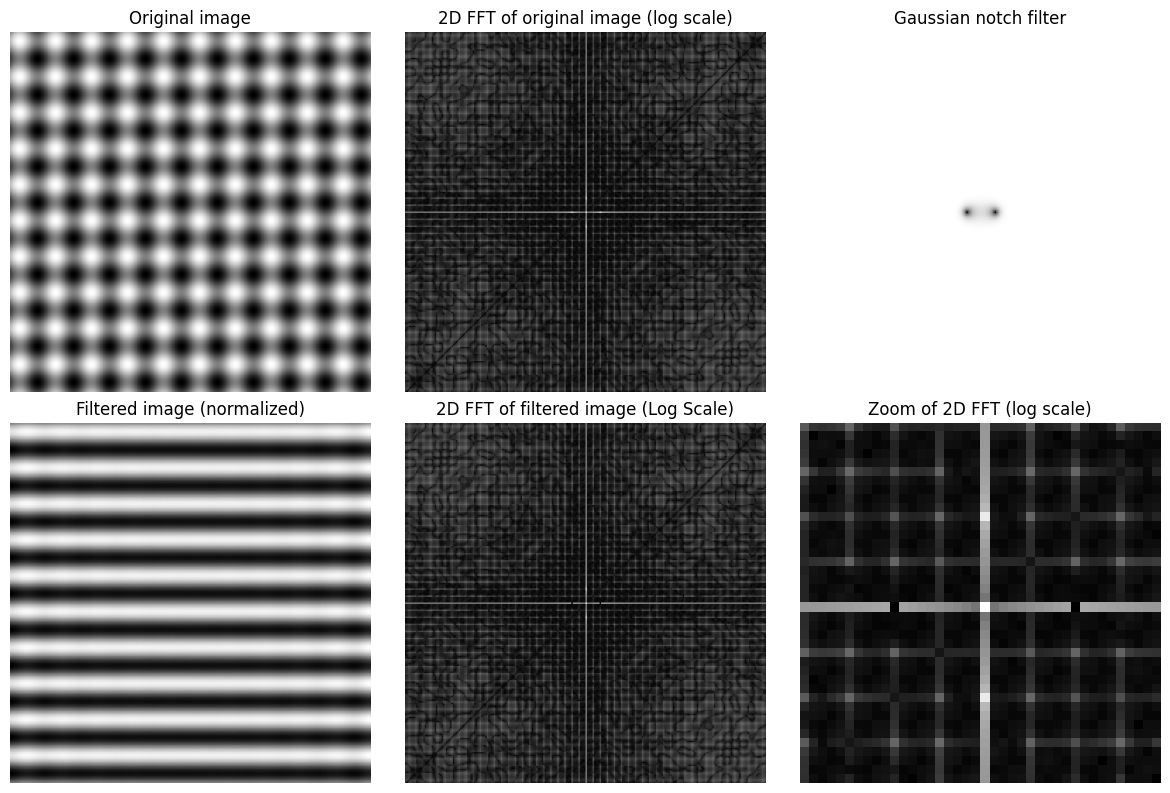

In [ ]:
# Function to create a Gaussian notch filter
def gaussian_notch_filter(rows, cols, D0, u_k, v_k):
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))  # Create grid of coordinates
    D1 = np.sqrt((x - u_k)**2 + (y - v_k)**2)  # Distance from (u_k, v_k)
    D2 = np.sqrt((x - (cols - u_k))**2 + (y - (rows - v_k))**2)  # Distance from (-u_k, -v_k)
    notch_filter = 1 - np.exp(-0.5 * ((D1 * D2) / D0**2))
    return notch_filter

# Load the image
image_path = '/content/drive/MyDrive/PIM/Images/combined_bands.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)  # Convert to float32 format before applying FFT

# Perform the 2D FFT and shift the zero-frequency component to the center
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Create the Gaussian notch filter
D0 = 5  # Standard deviation of the Gaussian filter
u_k, v_k = 118, 128  # Coordinates of the notch location in the frequency domain
rows, cols = image.shape
# Create a Gaussian notch filter centered at (u_k, v_k) and (-u_k, -v_k)
gaussian_notch = gaussian_notch_filter(rows, cols, D0, u_k, v_k)

# Apply the Gaussian notch filter in the frequency domain
filtered_real = dft_shifted[:, :, 0] * gaussian_notch
filtered_imaginary = dft_shifted[:, :, 1] * gaussian_notch
filtered_dft = np.dstack((filtered_real, filtered_imaginary))

# Shift back and compute the inverse FFT to get the filtered image
filtered_dft_shifted_back = np.fft.ifftshift(filtered_dft)
filtered_image = cv2.idft(filtered_dft_shifted_back)
filtered_image_magnitude = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Compute the magnitude spectrum of the original and filtered images
magnitude_spectrum_original = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
filtered_magnitude_spectrum = cv2.magnitude(filtered_dft[:, :, 0], filtered_dft[:, :, 1])

# Plot the results
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(np.uint8(image), cmap='gray')
plt.title("Original image")
plt.axis('off')

# 2D FFT of the original image (log scale)
plt.subplot(2, 3, 2)
plt.imshow(np.log1p(magnitude_spectrum_original), cmap='gray')
plt.title("2D FFT of original image (log scale)")
plt.axis('off')

# Gaussian Notch filter
plt.subplot(2, 3, 3)
plt.imshow(gaussian_notch, cmap='gray')
plt.title("Gaussian notch filter")
plt.axis('off')

# Filtered image (normalized)
plt.subplot(2, 3, 4)
plt.imshow(cv2.normalize(filtered_image_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8), cmap='gray')
plt.title("Filtered image (normalized)")
plt.axis('off')

# 2D FFT of the filtered image (log scale)
plt.subplot(2, 3, 5)
plt.imshow(np.log1p(filtered_magnitude_spectrum), cmap='gray')
plt.title("2D FFT of filtered image (Log Scale)")
plt.axis('off')

# Zoom of the central part of the 2D FFT of the filtered image (log scale)
zoom_factor = 20  # Size of zoom area
c_row, c_col = rows // 2, cols // 2  # center of the FFT
plt.subplot(2, 3, 6)
plt.imshow(np.log1p(filtered_magnitude_spectrum[c_row - zoom_factor:c_row + zoom_factor,
                                   c_col - zoom_factor:c_col + zoom_factor]), cmap='gray')
plt.title("Zoom of 2D FFT (log scale)")
plt.axis('off')

plt.tight_layout()
plt.show()

#### **Butterworth Notch Filter**

A Butterworth notch filter works similarly to the Gaussian notch filter, but it uses a Butterworth formulation. The Butterworth filter has an **order** $n$, which controls how steep the transition is between the notch and the passband.

The Butterworth notch filter is defined as:

$$H_{\text{NP}}(u, v) = \frac{1}{1 + \left( \frac{D_0^2}{D_1(u, v) \cdot D_2(u, v)} \right)^n}$$

where:

* $D_1(u, v)$ is the Euclidean distance from the point $(u, v)$ in the frequency domain to the center of the first notch location,
* $D_2(u, v)$ is the distance to the second notch location in the frequency domain,
* $D_0$ is the cutoff distance that controls the width of the notch,
* $n$ is the order of the filter, which controls the sharpness of the filter.

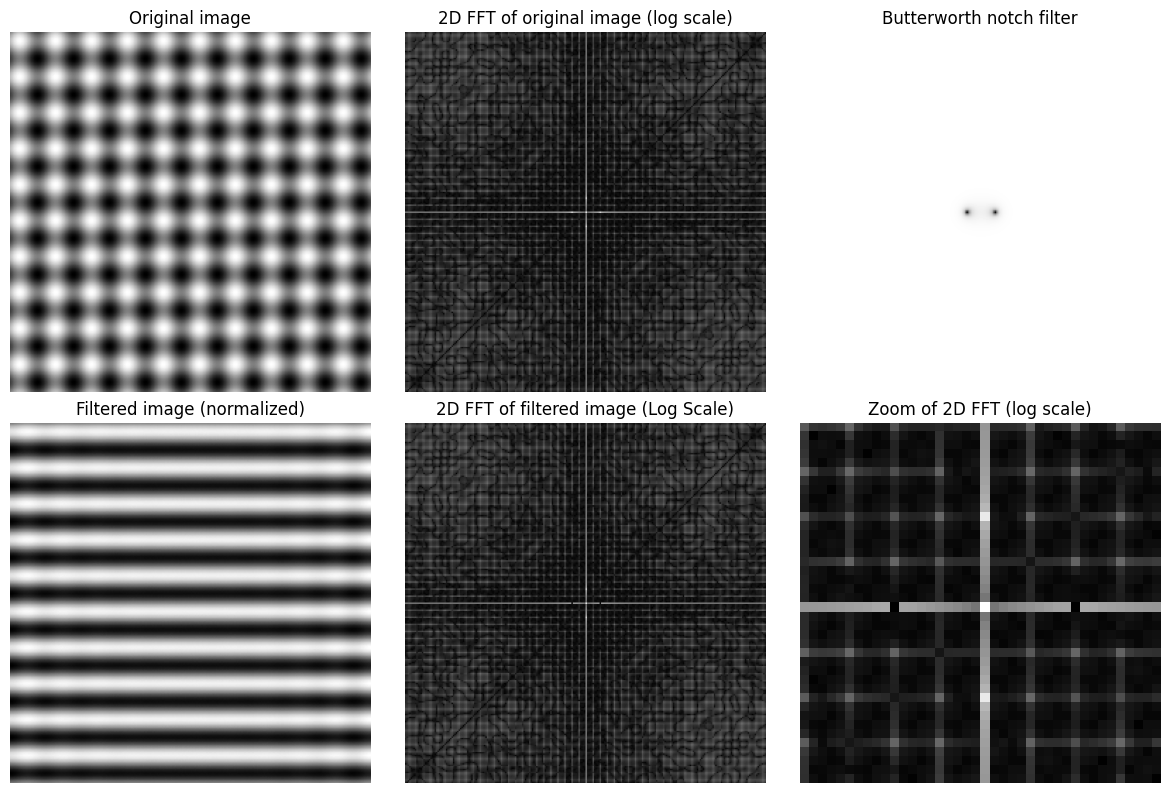

In [ ]:
# Function to create a Butterworth notch filter
def butterworth_notch_filter(rows, cols, D0, u_k, v_k, n, epsilon=1e-6):
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))  # Create grid of coordinates
    D1 = np.sqrt((x - u_k)**2 + (y - v_k)**2)  # Distance from (u_k, v_k)
    D2 = np.sqrt((x - (cols - u_k))**2 + (y - (rows - v_k))**2)  # Distance from (-u_k, -v_k)
    notch_filter = 1 / (1 + ((D0**2) / ((D1 + epsilon) * (D2 + epsilon)))**n)  # Butterworth notch filter formula
    return notch_filter

# Load the image
image_path = '/content/drive/MyDrive/PIM/Images/combined_bands.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)  # Convert to float32 format before applying FFT

# Perform the 2D FFT and shift the zero-frequency component to the center
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Create the Butterworth notch filter
D0 = 5  # Standard deviation of the filter
u_k, v_k = 118, 128  # Coordinates of the notch location in the frequency domain
n = 2  # Order of the Butterworth filter
rows, cols = image.shape

# Create a Butterworth notch filter centered at (u_k, v_k) and (-u_k, -v_k)
butterworth_notch = butterworth_notch_filter(rows, cols, D0, u_k, v_k, n)

# Apply the Butterworth notch filter in the frequency domain
filtered_real = dft_shifted[:, :, 0] * butterworth_notch
filtered_imaginary = dft_shifted[:, :, 1] * butterworth_notch
filtered_dft = np.dstack((filtered_real, filtered_imaginary))

# Shift back and compute the inverse FFT to get the filtered image
filtered_dft_shifted_back = np.fft.ifftshift(filtered_dft)
filtered_image = cv2.idft(filtered_dft_shifted_back)
filtered_image_magnitude = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Compute the magnitude spectrum of the original and filtered images
magnitude_spectrum_original = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
filtered_magnitude_spectrum = cv2.magnitude(filtered_dft[:, :, 0], filtered_dft[:, :, 1])

# Plot the results
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(np.uint8(image), cmap='gray')
plt.title("Original image")
plt.axis('off')

# 2D FFT of the original image (log scale)
plt.subplot(2, 3, 2)
plt.imshow(np.log1p(magnitude_spectrum_original), cmap='gray')
plt.title("2D FFT of original image (log scale)")
plt.axis('off')

# Butterworth Notch filter
plt.subplot(2, 3, 3)
plt.imshow(butterworth_notch, cmap='gray')
plt.title("Butterworth notch filter")
plt.axis('off')

# Filtered image (normalized)
plt.subplot(2, 3, 4)
plt.imshow(cv2.normalize(filtered_image_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8), cmap='gray')
plt.title("Filtered image (normalized)")
plt.axis('off')

# 2D FFT of the filtered image (log scale)
plt.subplot(2, 3, 5)
plt.imshow(np.log1p(filtered_magnitude_spectrum), cmap='gray')
plt.title("2D FFT of filtered image (Log Scale)")
plt.axis('off')

# Zoom of the central part of the 2D FFT of the filtered image (log scale)
zoom_factor = 20  # Size of zoom area
c_row, c_col = rows // 2, cols // 2  # center of the FFT
plt.subplot(2, 3, 6)
plt.imshow(np.log1p(filtered_magnitude_spectrum[c_row - zoom_factor:c_row + zoom_factor,
                                   c_col - zoom_factor:c_col + zoom_factor]), cmap='gray')
plt.title("Zoom of 2D FFT (log scale)")
plt.axis('off')

plt.tight_layout()
plt.show()

## References

* González, Rafael C., _Digital image processing: Chapter 4 (Filtering in the Frequency Domain)_. Prentice Hall,. 2018. 9780132345637

* Chityala, Ravishankar, _Image Processing and Acquisition Using Python: Chapter 7 (Fourier Transform)_. Chapman and Hall/CRC, 2022. 9780367531577

* Birkfellner, Wolfgang, _Applied Medical Image Processing - A Basic Course: Chapter 5 (Filtering and Transformations)_. CRC Press, 2014. 9781466555570

